In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
eta = 0.977

In [4]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans",
    "text.latex.preamble": r"""
        \usepackage{amsmath}
        \usepackage{helvet}
        \renewcommand{\familydefault}{\sfdefault}
    """
})

# Load Data

In [5]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()

In [6]:
data_folder = os.path.join(repo_root, 'multi-parameter-estimation', 'data')

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-06-23--17h-20m-46s',
 '2025-06-23--17h-27m-45s',
 '2025-06-23--17h-34m-51s',
 '2025-06-23--17h-41m-57s',
 '2025-06-23--17h-49m-03s',
 '2025-06-23--17h-56m-10s',
 '2025-06-23--18h-03m-17s',
 '2025-06-23--18h-10m-25s',
 '2025-06-23--18h-17m-34s',
 '2025-06-23--18h-24m-42s',
 '2025-06-23--18h-31m-50s',
 '2025-06-23--18h-38m-58s',
 '2025-06-23--18h-46m-06s',
 '2025-06-23--18h-53m-14s',
 '2025-06-23--19h-00m-21s',
 '2025-06-23--19h-07m-29s',
 '2025-06-23--19h-14m-37s',
 '2025-06-23--19h-21m-44s',
 '2025-06-23--19h-28m-52s',
 '2025-06-23--19h-35m-59s',
 '2025-06-23--19h-43m-06s',
 '2025-06-23--19h-50m-12s',
 '2025-06-23--19h-57m-19s',
 '2025-06-23--20h-04m-24s',
 '2025-06-23--20h-11m-31s',
 '2025-06-23--20h-18m-37s',
 '2025-06-23--20h-25m-58s',
 '2025-06-23--20h-33m-05s',
 '2025-06-23--20h-40m-12s',
 '2025-06-23--20h-47m-20s',
 '2025-06-23--20h-54m-28s',
 '2025-06-23--21h-01m-36s',
 '2025-06-23--21h-08m-43s',
 '2025-06-23--21h-15m-50s',
 '2025-06-23--21h-22m-56s',
 '2025-06-23--21h-30

In [7]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "corrected_estimators.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    # if repetitions is not in params, set it to 1
    if "repetitions" not in params.columns:
        params["repetitions"] = pd.Series([1])
    else:
        params["repetitions"] = params["repetitions"].astype(int)

    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    # Skip the directories with no estimates
    if not os.path.exists(os.path.join(data_folder, data_dir, "corrected_estimators.csv")):
        continue
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

,data_dir,C',HH,SB,VV,N,theta_estimate,delta_phi_estimate,clipped_delta_phi_estimate,theta,delta_phi
0,2025-06-23--17h-20m-46s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
1,2025-06-23--17h-20m-46s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
2,2025-06-23--17h-20m-46s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
3,2025-06-23--17h-20m-46s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
4,2025-06-23--17h-20m-46s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3652830,2025-06-24--08h-04m-38s,84.0,64.0,2.0,50.0,200.0,1.500739,1.460882,1.460882,1.570796,1.570796
3652831,2025-06-24--08h-04m-38s,95.0,54.0,1.0,50.0,200.0,1.550795,NaN,1.570796,1.570796,1.570796
3652832,2025-06-24--08h-04m-38s,96.0,59.0,1.0,44.0,200.0,1.495726,NaN,1.570796,1.570796,1.570796
3652833,2025-06-24--08h-04m-38s,94.0,54.0,1.0,51.0,200.0,1.555796,NaN,1.570796,1.570796,1.570796


In [8]:
estimates_df[estimates_df["N"] > 201][estimates_df["theta"] == 0]

/tmp/ipykernel_2079439/3925035558.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  estimates_df[estimates_df["N"] > 201][estimates_df["theta"] == 0]


,data_dir,C',HH,SB,VV,N,theta_estimate,delta_phi_estimate,clipped_delta_phi_estimate,theta,delta_phi
30305,2025-06-23--17h-20m-46s,247.0,529964.0,702.0,7.0,530920.0,0.060239,0.528929,0.528929,0.0,0.000000
760507,2025-06-23--20h-18m-37s,182.0,527003.0,770.0,5.0,527960.0,0.060377,0.443212,0.443212,0.0,0.785398
1494060,2025-06-23--23h-16m-52s,190.0,532057.0,827.0,6.0,533080.0,0.062144,0.437435,0.437435,0.0,1.570796


# Load Theory Curves

In [9]:
theta_theory = pd.read_csv(os.path.join(repo_root, 'theory', 'theta_estimator_stats.csv'))
theta_theory

,theta,n,theta_estimator_mean,theta_estimator_variance
0,0.000000,40,0.000000,0.000000
1,0.006283,40,0.000177,0.000040
2,0.012566,40,0.000707,0.000158
3,0.018850,40,0.001589,0.000354
4,0.025133,40,0.002820,0.000626
...,...,...,...,...
2500,3.116460,200,3.135388,0.000594
2501,3.122743,200,3.138075,0.000343
2502,3.129026,200,3.140020,0.000156
2503,3.135309,200,3.141198,0.000039


In [10]:
# load all the csv files in the theory folder
theory_dfs = []

# pi/2
theory_files = [f for f in os.listdir(os.path.join(repo_root, 'theory', 'delta_phi_estimator_stats', 'theta=pi-by-2')) if f.endswith('.csv')]
for file in theory_files:
    df = pd.read_csv(os.path.join(repo_root, 'theory', 'delta_phi_estimator_stats', 'theta=pi-by-2', file))
    df['data_dir'] = file.replace('.csv', '')
    df['theta'] = np.pi / 2
    # data_dir['data_dir'].split('=')[1]  # Extracting n from the data_dir name
    df['n'] = df['data_dir'].str.split('=').str[1].astype(int)  # or .astype(float) if needed

    theory_dfs.append(df)

# pi/4
theory_files = [f for f in os.listdir(os.path.join(repo_root, 'theory', 'delta_phi_estimator_stats', 'theta=pi-by-4')) if f.endswith('.csv')]
for file in theory_files:
    df = pd.read_csv(os.path.join(repo_root, 'theory', 'delta_phi_estimator_stats', 'theta=pi-by-4', file))
    df['data_dir'] = file.replace('.csv', '')
    df['theta'] = np.pi / 4
    # data_dir['data_dir'].split('=')[1]  # Extracting n from the data_dir name
    df['n'] = df['data_dir'].str.split('=').str[1].astype(int)  # or .astype(float) if needed

    theory_dfs.append(df)

# Concatenate all theory DataFrames into a single DataFrame
theory_df = pd.concat(theory_dfs, ignore_index=True)
theory_df

,delta_phi,E_nu_1.000,VarCRB_nu_1.000,E_nu_0.970,VarCRB_nu_0.970,E_nu_0.971,VarCRB_nu_0.971,E_nu_0.972,VarCRB_nu_0.972,E_nu_0.973,...,VarCRB_nu_0.977,E_nu_0.978,VarCRB_nu_0.978,E_nu_0.979,VarCRB_nu_0.979,E_nu_0.980,VarCRB_nu_0.980,data_dir,theta,n
0,0.003142,-0.003043,0.003957,0.097754,3.745658e-04,0.099481,3.586368e-04,0.101144,3.442170e-04,0.102745,...,3.638311e-04,0.101073,5.193501e-04,0.087420,8.352304e-04,0.072902,1.010438e-03,phase_estimation_data_n=200,1.570796,200
1,0.006283,-0.005888,0.015782,0.094677,1.497962e-03,0.096402,1.434300e-03,0.098063,1.376665e-03,0.099663,...,1.453869e-03,0.098007,2.073095e-03,0.084383,3.332690e-03,0.069879,4.034000e-03,phase_estimation_data_n=200,1.570796,200
2,0.009425,-0.008538,0.035336,0.091643,3.369287e-03,0.093365,3.226249e-03,0.095023,3.096737e-03,0.096620,...,3.265797e-03,0.094991,4.648466e-03,0.081416,7.467906e-03,0.066937,9.047577e-03,phase_estimation_data_n=200,1.570796,200
3,0.012566,-0.010993,0.062388,0.088651,5.987042e-03,0.090369,5.733255e-03,0.092024,5.503427e-03,0.093618,...,5.792592e-03,0.092026,8.224657e-03,0.078517,1.320082e-02,0.064073,1.601312e-02,phase_estimation_data_n=200,1.570796,200
4,0.015708,-0.013256,0.096623,0.085703,9.349137e-03,0.087416,8.953604e-03,0.089065,8.595333e-03,0.090655,...,9.024762e-03,0.089110,1.277351e-02,0.075686,2.047686e-02,0.061287,2.487836e-02,phase_estimation_data_n=200,1.570796,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.558230,0.011858,0.012819,-0.194025,1.888610e-03,-0.194673,1.891285e-03,-0.195317,1.895156e-03,-0.195957,...,1.936816e-03,-0.199101,1.950814e-03,-0.199719,1.967259e-03,-0.200334,1.986486e-03,phase_estimation_data_n=80,0.785398,80
4996,1.561372,0.009026,0.007220,-0.197089,1.063838e-03,-0.197737,1.065422e-03,-0.198381,1.067688e-03,-0.199022,...,1.091752e-03,-0.202168,1.099806e-03,-0.202786,1.109261e-03,-0.203402,1.120313e-03,phase_estimation_data_n=80,0.785398,80
4997,1.564513,0.006106,0.003212,-0.200174,4.732952e-04,-0.200823,4.740247e-04,-0.201468,4.750601e-04,-0.202108,...,4.859582e-04,-0.205256,4.895956e-04,-0.205875,4.938646e-04,-0.206490,4.988532e-04,phase_estimation_data_n=80,0.785398,80
4998,1.567655,0.003097,0.000804,-0.203283,1.183959e-04,-0.203931,1.185821e-04,-0.204576,1.188453e-04,-0.205217,...,1.216005e-04,-0.208365,1.225187e-04,-0.208984,1.235960e-04,-0.209600,1.248548e-04,phase_estimation_data_n=80,0.785398,80


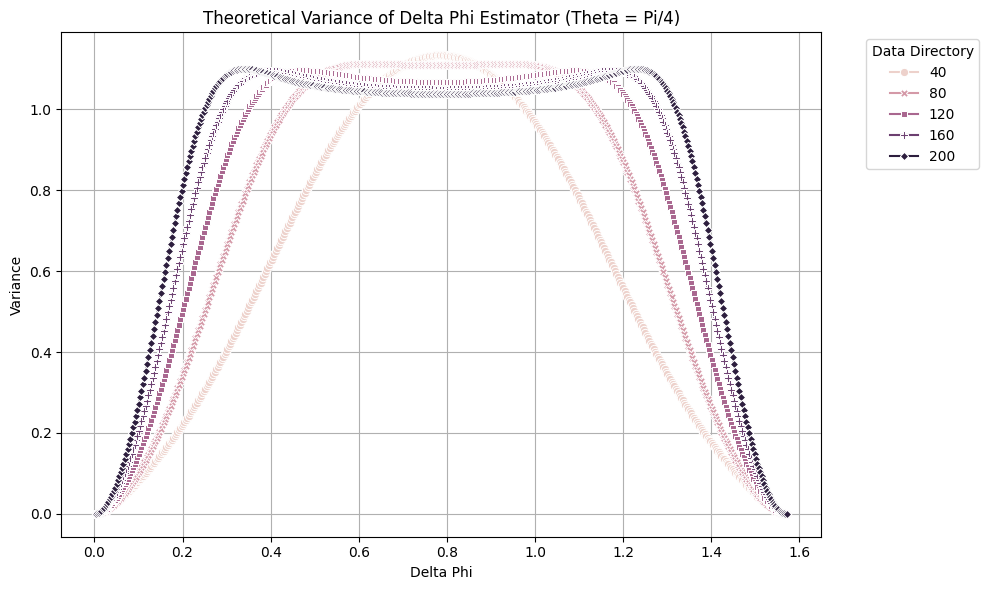

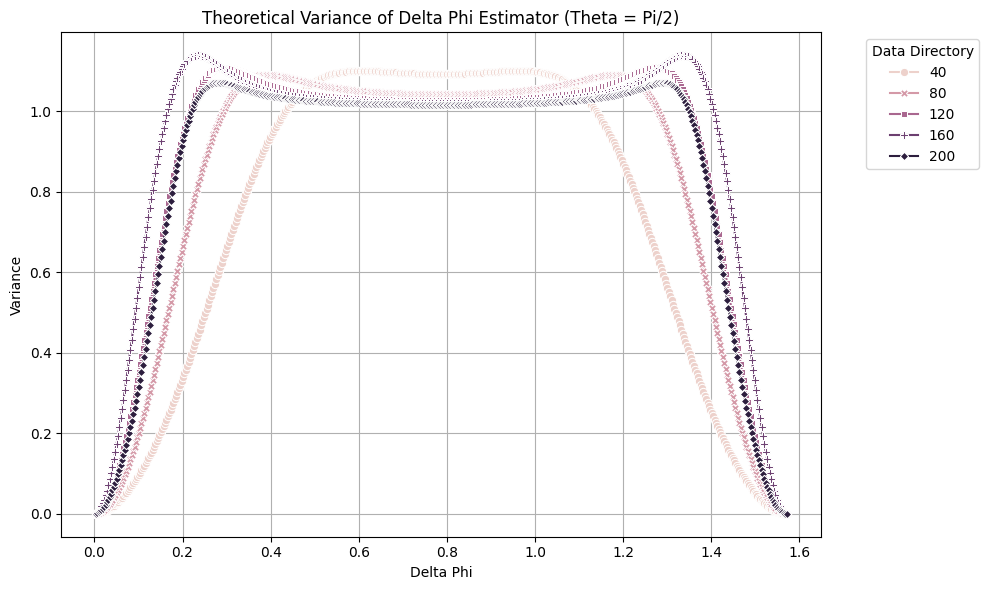

In [11]:
# plot the theory curves
plt.figure(figsize=(10, 6))
sns.lineplot(data=theory_df[
    np.isclose(theory_df['theta'], np.pi / 4)
    ], x='delta_phi', y=f'VarCRB_nu_{eta:.3f}', hue='n', style='n', markers=True, dashes=False)
plt.title('Theoretical Variance of Delta Phi Estimator (Theta = Pi/4)')
plt.xlabel('Delta Phi')
plt.ylabel('Variance')
plt.legend(title='Data Directory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

# plot the theory curves
plt.figure(figsize=(10, 6))
sns.lineplot(data=theory_df[
    np.isclose(theory_df['theta'], np.pi / 2)
    ], x='delta_phi', y=f'VarCRB_nu_{eta:.3f}', hue='n', style='n', markers=True, dashes=False)
plt.title('Theoretical Variance of Delta Phi Estimator (Theta = Pi/2)')
plt.xlabel('Delta Phi')
plt.ylabel('Variance')
plt.legend(title='Data Directory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()


In [12]:
# load theta_estimator_stats.csv
theta_estimator_stats = pd.read_csv(os.path.join(repo_root, 'theory', 'theta_estimator_stats.csv'))
theta_estimator_stats

,theta,n,theta_estimator_mean,theta_estimator_variance
0,0.000000,40,0.000000,0.000000
1,0.006283,40,0.000177,0.000040
2,0.012566,40,0.000707,0.000158
3,0.018850,40,0.001589,0.000354
4,0.025133,40,0.002820,0.000626
...,...,...,...,...
2500,3.116460,200,3.135388,0.000594
2501,3.122743,200,3.138075,0.000343
2502,3.129026,200,3.140020,0.000156
2503,3.135309,200,3.141198,0.000039


# Theta

In [13]:
# round N to the nearest 40
estimates_df["nearest_40_N"] = estimates_df["N"].apply(lambda x: 0 if x > 200 else round(x / 40) * 40)
estimates_df

,data_dir,C',HH,SB,VV,N,theta_estimate,delta_phi_estimate,clipped_delta_phi_estimate,theta,delta_phi,nearest_40_N
0,2025-06-23--17h-20m-46s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
1,2025-06-23--17h-20m-46s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
2,2025-06-23--17h-20m-46s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
3,2025-06-23--17h-20m-46s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
4,2025-06-23--17h-20m-46s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,NaN,0.000000,0.000000,40
...,...,...,...,...,...,...,...,...,...,...,...,...
3652830,2025-06-24--08h-04m-38s,84.0,64.0,2.0,50.0,200.0,1.500739,1.460882,1.460882,1.570796,1.570796,200
3652831,2025-06-24--08h-04m-38s,95.0,54.0,1.0,50.0,200.0,1.550795,NaN,1.570796,1.570796,1.570796,200
3652832,2025-06-24--08h-04m-38s,96.0,59.0,1.0,44.0,200.0,1.495726,NaN,1.570796,1.570796,1.570796,200
3652833,2025-06-24--08h-04m-38s,94.0,54.0,1.0,51.0,200.0,1.555796,NaN,1.570796,1.570796,1.570796,200


In [14]:
theta_estimates = estimates_df.groupby(["N", "theta", "delta_phi"]).agg({
    "theta_estimate": ["mean", "std", "var",],
    "theta": "count",
    "delta_phi_estimate": ["mean", "std", "var"]
}).reset_index().rename(columns={"nearest_40_N": "N (rounded to nearest 40)"})
theta_estimates.columns = ['_'.join(col).strip() for col in theta_estimates.columns.values]
theta_estimates

,N_,theta_,delta_phi_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var
0,40.0,0.000000,0.000000,0.015741,0.058285,0.003397,13273,0.798789,0.048283,0.002331
1,40.0,0.000000,0.785398,0.015834,0.058401,0.003411,13199,0.785398,0.000000,0.000000
2,40.0,0.000000,1.570796,0.016770,0.059980,0.003598,13327,0.785398,0.000000,0.000000
3,40.0,0.130900,0.000000,0.074997,0.114128,0.013025,13286,0.762601,0.059080,0.003490
4,40.0,0.130900,0.785398,0.060032,0.105092,0.011044,13262,0.780953,0.064223,0.004125
...,...,...,...,...,...,...,...,...,...,...
715,536880.0,0.785398,0.000000,0.776605,NaN,NaN,1,0.094519,NaN,NaN
716,538120.0,0.785398,0.130900,0.774655,NaN,NaN,1,0.122903,NaN,NaN
717,538680.0,0.785398,0.523599,0.775550,NaN,NaN,1,0.481115,NaN,NaN
718,539120.0,0.785398,0.458149,0.769843,NaN,NaN,1,0.413904,NaN,NaN


In [15]:
theta_estimates_integrated_over_phi = estimates_df.groupby(["N", "theta"]).agg({
    "theta_estimate": ["mean", "std", "var",],
    "theta": "count",

}).reset_index().rename(columns={"nearest_40_N": "N (rounded to nearest 40)"})
theta_estimates_integrated_over_phi.columns = ['_'.join(col).strip() for col in theta_estimates_integrated_over_phi.columns.values]
theta_estimates_integrated_over_phi

,N_,theta_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count
0,40.0,0.000000,0.016116,0.058896,0.003469,39799
1,40.0,0.130900,0.065325,0.108524,0.011777,39917
2,40.0,0.261799,0.197849,0.143630,0.020630,40117
3,40.0,0.392699,0.346956,0.134025,0.017963,39830
4,40.0,0.523599,0.476084,0.119580,0.014299,35779
...,...,...,...,...,...,...
242,536880.0,0.785398,0.776605,NaN,NaN,1
243,538120.0,0.785398,0.774655,NaN,NaN,1
244,538680.0,0.785398,0.775550,NaN,NaN,1
245,539120.0,0.785398,0.769843,NaN,NaN,1


## Mean

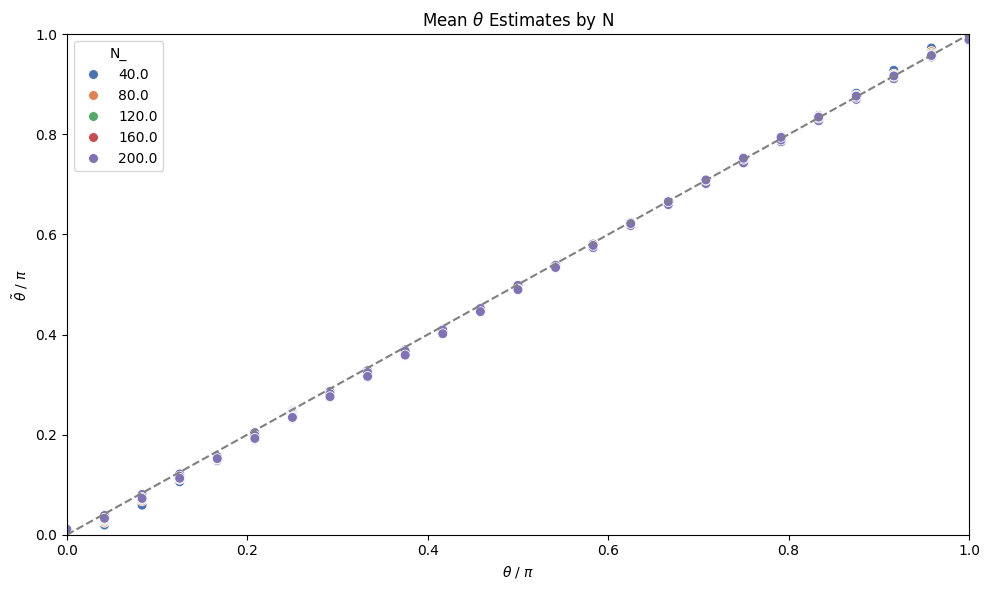

In [16]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"] < 201],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\tilde{\theta}$ / $\pi$")
plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.title(r"Mean $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0, 1)
# no legend

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_theta_estimates_by_N.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

## Error

### Uncompensated

/tmp/ipykernel_2079439/554328612.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered = theta_estimates[mask][theta_estimates["N_"] > 301]


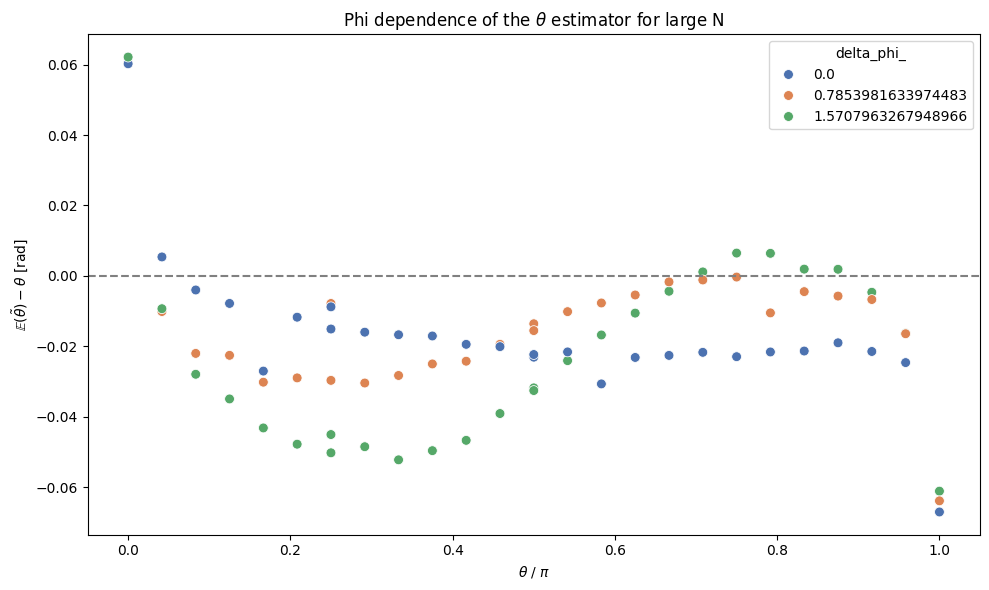

In [17]:
# Define tolerance (adjust as needed)
tol = 0.01  # radians

# Define target values for delta_phi
targets = [0, np.pi / 2, np.pi / 4]

# Create mask for filtering
mask = np.isclose(
    np.array(theta_estimates["delta_phi_"])[:, np.newaxis],
    targets,
    atol=tol
).any(axis=1)

# Apply mask to filter data
filtered = theta_estimates[mask][theta_estimates["N_"] > 301]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=filtered["theta_"] / np.pi,
    y=(filtered["theta_estimate_mean"] - filtered["theta_"]),
    hue=filtered["delta_phi_"],
    palette="deep",
    s=50,
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\mathbb{E}(\tilde{\theta}) - \theta\ [\text{rad}]$")
plt.axline((0, 0), slope=0, color="gray", linestyle="--")
plt.title(r"Phi dependence of the $\theta$ estimator for large N")

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "theta_estimator_bias_with_delta_phi_at_large_N.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

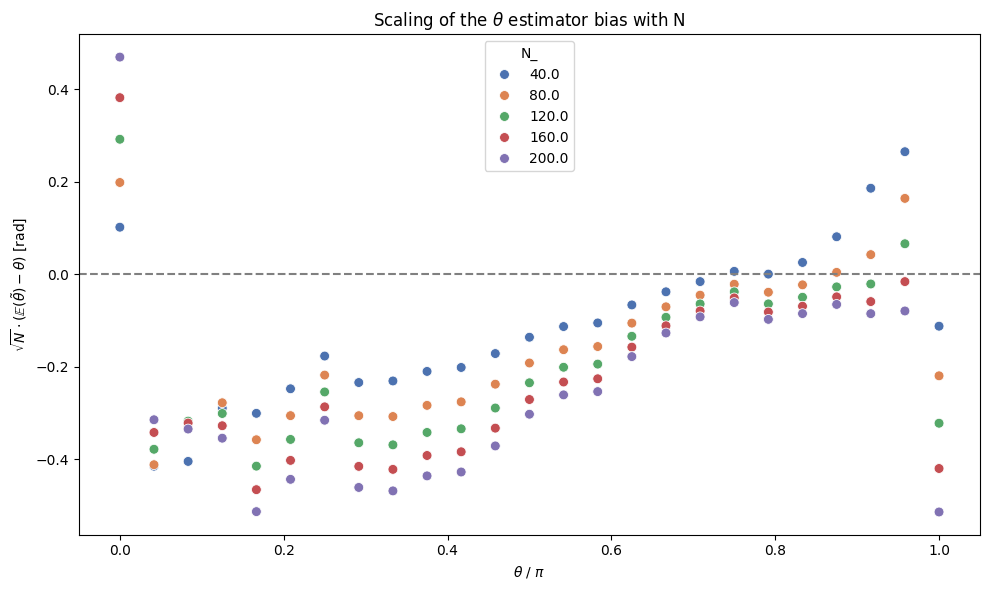

In [18]:
# Apply mask to filter data
filtered = theta_estimates_integrated_over_phi[theta_estimates_integrated_over_phi["N_"] <= 300]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=filtered["theta_"] / np.pi,
    y=(filtered["theta_estimate_mean"] - filtered["theta_"]) * np.sqrt(filtered["N_"]),
    hue=filtered["N_"],
    palette="deep",
    s=50,
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\sqrt{N} \cdot (\mathbb{E}(\tilde{\theta}) - \theta)\ [\text{rad}]$")
plt.axline((0, 0), slope=0, color="gray", linestyle="--")
plt.title(r"Scaling of the $\theta$ estimator bias with N")

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "theta_estimator_bias_with_N_raw.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

### Compensated

##### Integrated over phi

In [19]:
biggest_n_for_each_theta = theta_estimates_integrated_over_phi.groupby("theta_")["N_"].max().reset_index()
biggest_n_for_each_theta

,theta_,N_
0,0.000000,533080.0
1,0.130900,534760.0
2,0.261799,541480.0
3,0.392699,536760.0
4,0.523599,521400.0
5,0.654498,530000.0
6,0.785398,539120.0
7,0.916298,528360.0
8,1.047198,521720.0
9,1.178097,528240.0


In [20]:
max_n_theta_estimates_integrated_over_phi = theta_estimates_integrated_over_phi.merge(
    biggest_n_for_each_theta,
    on=["theta_", "N_"],
)
max_n_theta_estimates_integrated_over_phi

,N_,theta_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count
0,506760.0,2.487094,2.465479,NaN,NaN,1
1,506800.0,1.832596,1.824895,NaN,NaN,1
2,511040.0,3.141593,3.077692,NaN,NaN,1
3,512000.0,1.963495,1.958064,NaN,NaN,1
4,513440.0,2.879793,2.873075,NaN,NaN,1
5,516080.0,2.356194,2.355858,NaN,NaN,1
6,516840.0,2.748894,2.729884,NaN,NaN,1
7,516880.0,3.010693,2.986062,NaN,NaN,1
8,517720.0,2.225295,2.203577,NaN,NaN,1
9,520720.0,2.094395,2.071807,NaN,NaN,1


In [21]:
# merge the two dataframes
theta_estimates_integrated_over_phi_with_max_n = theta_estimates_integrated_over_phi.merge(
    max_n_theta_estimates_integrated_over_phi[["N_", "theta_", "theta_estimate_mean"]],
    on=["theta_"],
    suffixes=("", "_max_n"),
)
theta_estimates_integrated_over_phi_with_max_n

,N_,theta_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,N__max_n,theta_estimate_mean_max_n
0,40.0,0.000000,0.016116,0.058896,0.003469,39799,533080.0,0.062144
1,40.0,0.130900,0.065325,0.108524,0.011777,39917,534760.0,0.121573
2,40.0,0.261799,0.197849,0.143630,0.020630,40117,541480.0,0.239775
3,40.0,0.392699,0.346956,0.134025,0.017963,39830,536760.0,0.384868
4,40.0,0.523599,0.476084,0.119580,0.014299,35779,521400.0,0.493402
...,...,...,...,...,...,...,...,...
242,536880.0,0.785398,0.776605,NaN,NaN,1,539120.0,0.769843
243,538120.0,0.785398,0.774655,NaN,NaN,1,539120.0,0.769843
244,538680.0,0.785398,0.775550,NaN,NaN,1,539120.0,0.769843
245,539120.0,0.785398,0.769843,NaN,NaN,1,539120.0,0.769843


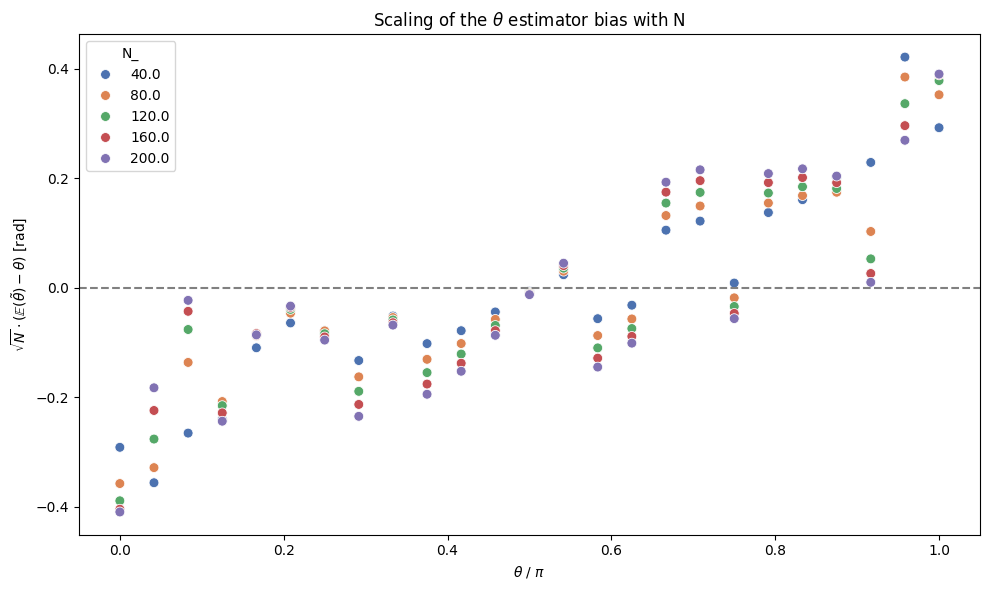

In [22]:
# Integrated over phi

# Apply mask to filter data
filtered = theta_estimates_integrated_over_phi_with_max_n[theta_estimates_integrated_over_phi_with_max_n["N_"] <= 300]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=filtered["theta_"] / np.pi,
    y=(filtered["theta_estimate_mean"] - filtered["theta_estimate_mean_max_n"]) * np.sqrt(filtered["N_"]),
    hue=filtered["N_"],
    palette="deep",
    s=50,
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\sqrt{N} \cdot (\mathbb{E}(\tilde{\theta}) - \theta)\ [\text{rad}]$")
plt.axline((0, 0), slope=0, color="gray", linestyle="--")
plt.title(r"Scaling of the $\theta$ estimator bias with N")

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "theta_estimator_bias_with_N_integrated_over_phi.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

##### Not integrated over phi

In [23]:
biggest_n_for_each_theta_phi = theta_estimates.groupby(["theta_", "delta_phi_"]).agg({
    "N_": "max"
}).reset_index()
biggest_n_for_each_theta_phi

,theta_,delta_phi_,N_
0,0.000000,0.000000,530920.0
1,0.000000,0.785398,527960.0
2,0.000000,1.570796,533080.0
3,0.130900,0.000000,531440.0
4,0.130900,0.785398,530480.0
...,...,...,...
114,3.010693,0.785398,514920.0
115,3.010693,1.570796,509440.0
116,3.141593,0.000000,391920.0
117,3.141593,0.785398,511040.0


In [24]:
max_n_theta_estimates = theta_estimates.merge(
    biggest_n_for_each_theta_phi,
    on=["theta_", "delta_phi_", "N_"],
    suffixes=("", "_max_n")
)
max_n_theta_estimates

,N_,theta_,delta_phi_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var
0,391920.0,3.141593,0.000000,3.074529,NaN,NaN,1,0.448220,NaN,NaN
1,399640.0,0.785398,1.243547,0.740036,NaN,NaN,1,1.176985,NaN,NaN
2,411920.0,0.523599,0.000000,0.496555,NaN,NaN,1,0.109550,NaN,NaN
3,415560.0,2.487094,0.785398,2.476577,NaN,NaN,1,0.721009,NaN,NaN
4,451240.0,1.570796,1.505346,1.542488,NaN,NaN,1,1.474347,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
114,536880.0,0.785398,0.000000,0.776605,NaN,NaN,1,0.094519,NaN,NaN
115,538120.0,0.785398,0.130900,0.774655,NaN,NaN,1,0.122903,NaN,NaN
116,538680.0,0.785398,0.523599,0.775550,NaN,NaN,1,0.481115,NaN,NaN
117,539120.0,0.785398,0.458149,0.769843,NaN,NaN,1,0.413904,NaN,NaN


In [25]:
theta_estimates

,N_,theta_,delta_phi_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var
0,40.0,0.000000,0.000000,0.015741,0.058285,0.003397,13273,0.798789,0.048283,0.002331
1,40.0,0.000000,0.785398,0.015834,0.058401,0.003411,13199,0.785398,0.000000,0.000000
2,40.0,0.000000,1.570796,0.016770,0.059980,0.003598,13327,0.785398,0.000000,0.000000
3,40.0,0.130900,0.000000,0.074997,0.114128,0.013025,13286,0.762601,0.059080,0.003490
4,40.0,0.130900,0.785398,0.060032,0.105092,0.011044,13262,0.780953,0.064223,0.004125
...,...,...,...,...,...,...,...,...,...,...
715,536880.0,0.785398,0.000000,0.776605,NaN,NaN,1,0.094519,NaN,NaN
716,538120.0,0.785398,0.130900,0.774655,NaN,NaN,1,0.122903,NaN,NaN
717,538680.0,0.785398,0.523599,0.775550,NaN,NaN,1,0.481115,NaN,NaN
718,539120.0,0.785398,0.458149,0.769843,NaN,NaN,1,0.413904,NaN,NaN


In [26]:
# merge the two dataframes
theta_estimates_with_max_n = theta_estimates.merge(
    max_n_theta_estimates[["N_", "theta_", "delta_phi_", "theta_estimate_mean"]],
    on=["theta_", "delta_phi_"],
    suffixes=("", "_max_n"),
)
theta_estimates_with_max_n

,N_,theta_,delta_phi_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,N__max_n,theta_estimate_mean_max_n
0,40.0,0.000000,0.000000,0.015741,0.058285,0.003397,13273,0.798789,0.048283,0.002331,530920.0,0.060239
1,40.0,0.000000,0.785398,0.015834,0.058401,0.003411,13199,0.785398,0.000000,0.000000,527960.0,0.060377
2,40.0,0.000000,1.570796,0.016770,0.059980,0.003598,13327,0.785398,0.000000,0.000000,533080.0,0.062144
3,40.0,0.130900,0.000000,0.074997,0.114128,0.013025,13286,0.762601,0.059080,0.003490,531440.0,0.136275
4,40.0,0.130900,0.785398,0.060032,0.105092,0.011044,13262,0.780953,0.064223,0.004125,530480.0,0.120771
...,...,...,...,...,...,...,...,...,...,...,...,...
715,536880.0,0.785398,0.000000,0.776605,NaN,NaN,1,0.094519,NaN,NaN,536880.0,0.776605
716,538120.0,0.785398,0.130900,0.774655,NaN,NaN,1,0.122903,NaN,NaN,538120.0,0.774655
717,538680.0,0.785398,0.523599,0.775550,NaN,NaN,1,0.481115,NaN,NaN,538680.0,0.775550
718,539120.0,0.785398,0.458149,0.769843,NaN,NaN,1,0.413904,NaN,NaN,539120.0,0.769843


/tmp/ipykernel_2079439/2687764961.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered = theta_estimates_with_max_n[theta_estimates_with_max_n["N_"] <= 300][theta_estimates_with_max_n["delta_phi_"].isin([0, np.pi / 2, np.pi / 4])]


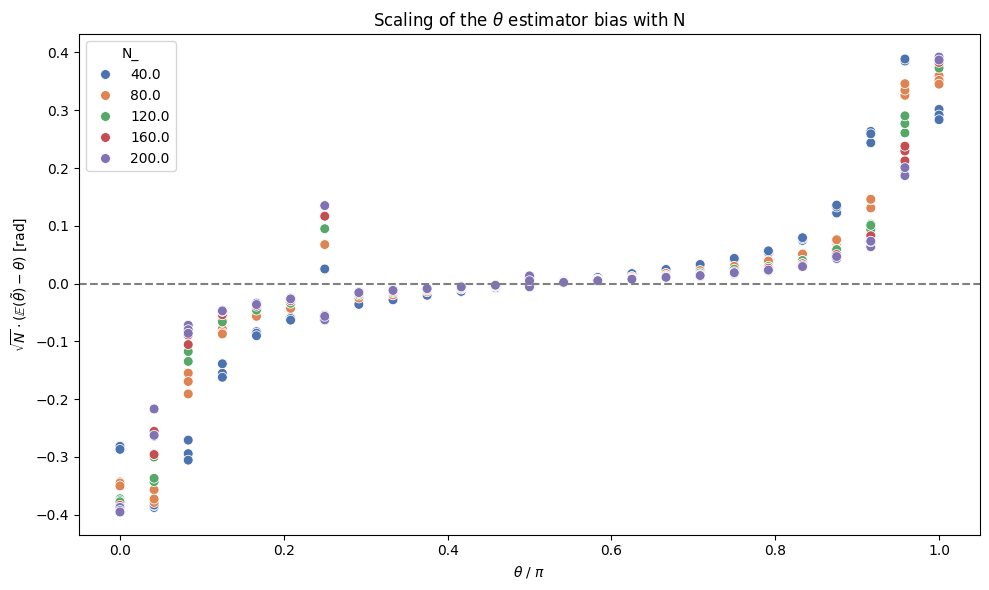

In [27]:
# Separate phi

# Apply mask to filter data
filtered = theta_estimates_with_max_n[theta_estimates_with_max_n["N_"] <= 300][theta_estimates_with_max_n["delta_phi_"].isin([0, np.pi / 2, np.pi / 4])]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=filtered["theta_"] / np.pi,
    y=(filtered["theta_estimate_mean"] - filtered["theta_estimate_mean_max_n"]) * np.sqrt(filtered["N_"]),
    hue=filtered["N_"],
    palette="deep",
    s=50,
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\sqrt{N} \cdot (\mathbb{E}(\tilde{\theta}) - \theta)\ [\text{rad}]$")
plt.axline((0, 0), slope=0, color="gray", linestyle="--")
plt.title(r"Scaling of the $\theta$ estimator bias with N")

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "theta_estimator_bias_with_N.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

In [28]:
filtered

,N_,theta_,delta_phi_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,N__max_n,theta_estimate_mean_max_n
0,40.0,0.000000,0.000000,0.015741,0.058285,0.003397,13273,0.798789,0.048283,0.002331,530920.0,0.060239
1,40.0,0.000000,0.785398,0.015834,0.058401,0.003411,13199,0.785398,0.000000,0.000000,527960.0,0.060377
2,40.0,0.000000,1.570796,0.016770,0.059980,0.003598,13327,0.785398,0.000000,0.000000,533080.0,0.062144
3,40.0,0.130900,0.000000,0.074997,0.114128,0.013025,13286,0.762601,0.059080,0.003490,531440.0,0.136275
4,40.0,0.130900,0.785398,0.060032,0.105092,0.011044,13262,0.780953,0.064223,0.004125,530480.0,0.120771
...,...,...,...,...,...,...,...,...,...,...,...,...
590,200.0,3.010693,0.785398,3.007468,0.061218,0.003748,2573,0.717738,0.154040,0.023728,514920.0,2.994254
591,200.0,3.010693,1.570796,3.008544,0.063207,0.003995,2547,0.913626,0.143891,0.020705,509440.0,2.994356
592,200.0,3.141593,0.000000,3.101982,0.054198,0.002937,1958,0.760726,0.092244,0.008509,391920.0,3.074529
593,200.0,3.141593,0.785398,3.105413,0.052733,0.002781,2554,0.759650,0.074939,0.005616,511040.0,3.077692


/tmp/ipykernel_2079439/1012574661.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered = theta_estimates_with_max_n[theta_estimates_with_max_n["N_"] <= 300][theta_estimates_with_max_n["delta_phi_"].isin([0, np.pi / 2, np.pi / 4])].groupby(["theta_", "N_"]).mean().reset_index()


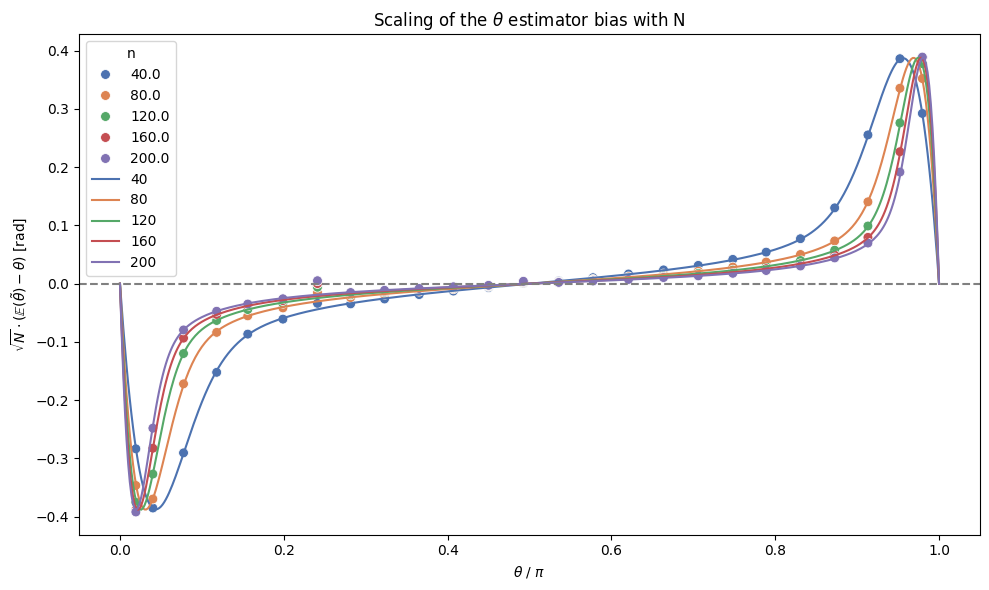

In [29]:
# Integrating the error over phi

filtered = theta_estimates_with_max_n[theta_estimates_with_max_n["N_"] <= 300][theta_estimates_with_max_n["delta_phi_"].isin([0, np.pi / 2, np.pi / 4])].groupby(["theta_", "N_"]).mean().reset_index()

# rename columns for clarity
# filtered_integrated_over_phi.columns = ['theta_', 'N_', 'theta_estimate_mean', 'theta_estimate_mean_max_n']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=filtered["theta_estimate_mean_max_n"] / np.pi,
    y=(filtered["theta_estimate_mean"] - filtered["theta_estimate_mean_max_n"]) * np.sqrt(filtered["N_"]),
    hue=filtered["N_"],
    palette="deep",
    s=50,
)

# Add the theory curve group by n
theory_curve = theta_theory

sns.lineplot(
    x=theory_curve["theta"] / np.pi,
    y=(theory_curve["theta_estimator_mean"] - theory_curve["theta"]) * np.sqrt(theory_curve["n"]),
    hue=theory_curve["n"],
    palette="deep",
)

plt.xlabel(r"$\theta$ / $\pi$")
plt.ylabel(r"$\sqrt{N} \cdot (\mathbb{E}(\tilde{\theta}) - \theta)\ [\text{rad}]$")
plt.axline((0, 0), slope=0, color="gray", linestyle="--")
plt.title(r"Scaling of the $\theta$ estimator bias with N")

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "theta_estimator_bias_with_N.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

## Variance

### Without Theory

#### By Phi

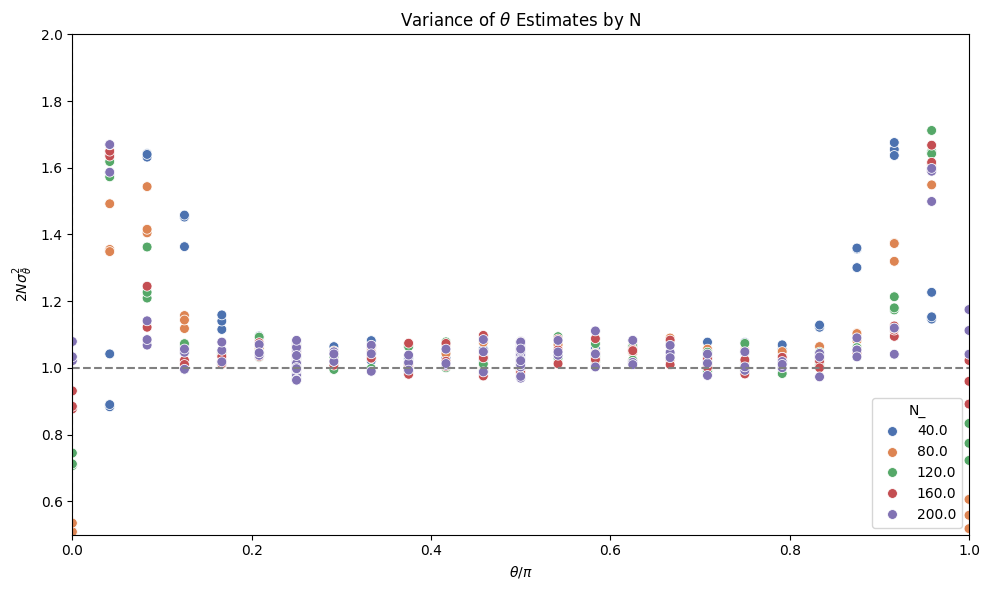

In [30]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"].isin([40, 80, 120, 160, 200])],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_var"] * 2 * theta_estimates["N_"],
    hue="N_",
    palette="deep",
    s=50,
)
plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0.5, 2)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

#### Integrated over phi

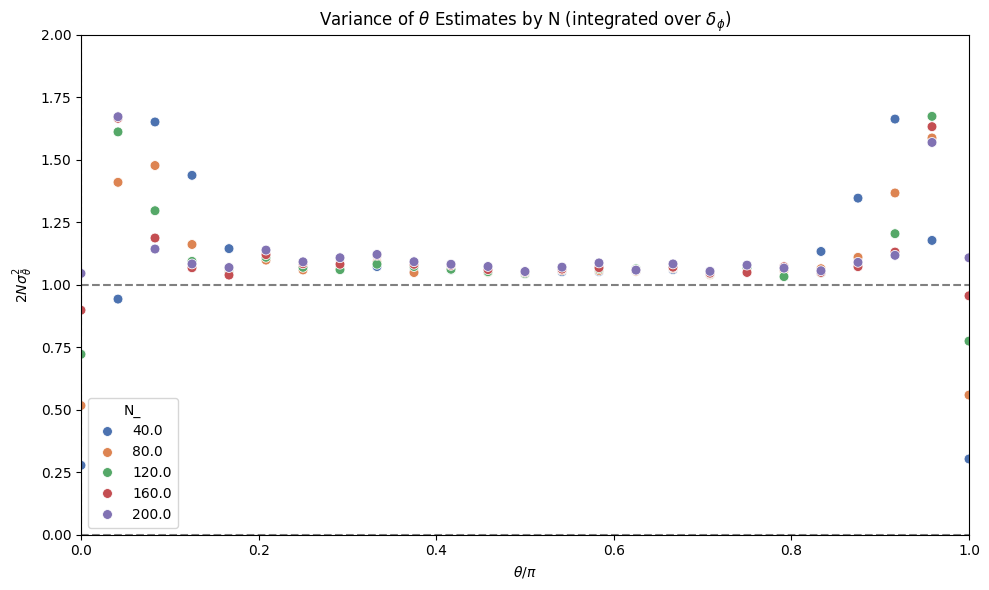

In [31]:
# plot theta_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=theta_estimates_integrated_over_phi[theta_estimates_integrated_over_phi["N_"].isin([40, 80, 120, 160, 200])],
    x=theta_estimates_integrated_over_phi["theta_"] / np.pi,
    y=theta_estimates_integrated_over_phi["theta_estimate_var"] * 2 * theta_estimates_integrated_over_phi["N_"],
    hue="N_",
    palette="deep",
    s=50,
)
plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N (integrated over $\delta_\phi$)")

plt.xlim(0, 1)
plt.ylim(0, 2)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N_integrated_over_phi.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

### With Theory

#### By phi

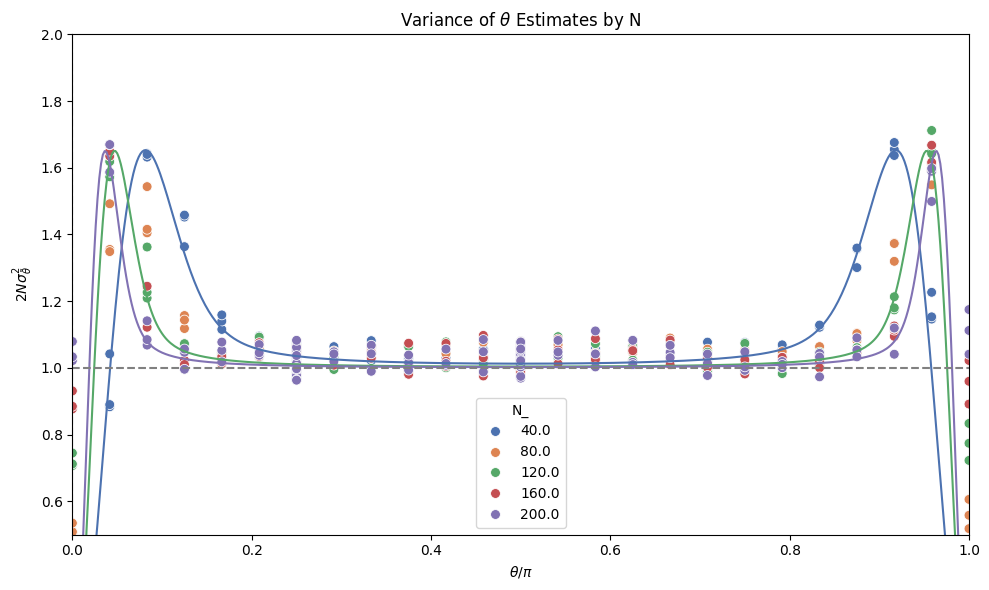

In [32]:
# plot theta_estimates with the theory curve
plt.figure(figsize=(10, 6))

N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

sns.scatterplot(
    data=theta_estimates[theta_estimates["N_"].isin([40, 80, 120, 160, 200])],
    x=theta_estimates["theta_"] / np.pi,
    y=theta_estimates["theta_estimate_var"] * 2 * theta_estimates["N_"],
    hue="N_",
    palette=color_dict,
    s=50,
)

# Add theory curve line
theta_theory_plot = theta_theory[theta_theory["n"].isin([40, 120, 200])]
sns.lineplot(
    data=theta_theory_plot,
    x=theta_theory_plot["theta"] / np.pi,
    y=theta_theory_plot["theta_estimator_variance"] * 2 * theta_theory_plot["n"],
    hue=theta_theory_plot["n"],
    palette=color_dict,
    legend=False,
)

plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N")

plt.xlim(0, 1)
plt.ylim(0.5, 2)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N.png"
)
plt.savefig(file_name, dpi=300)
plt.show()

#### Integrated over phi

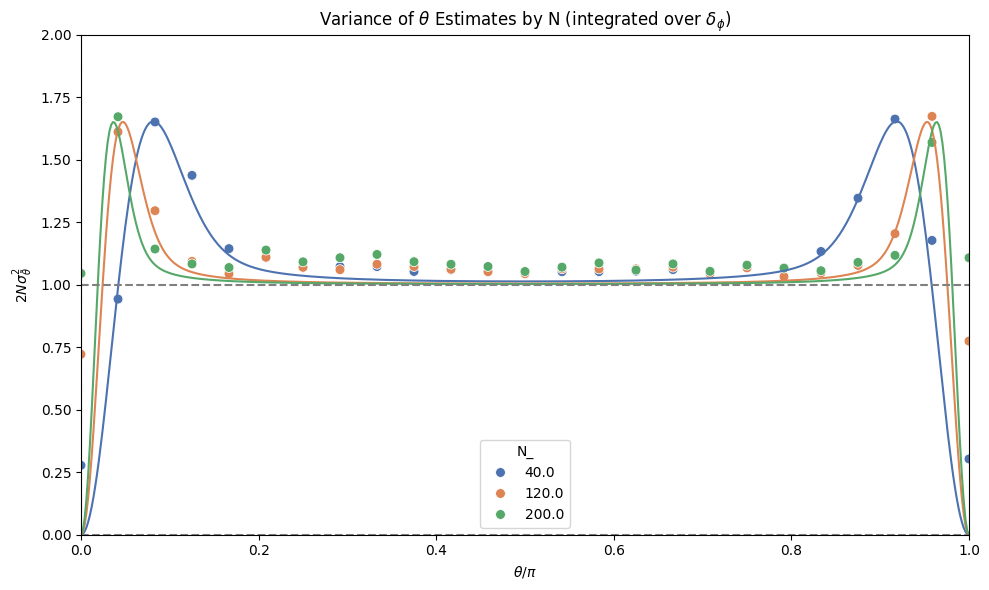

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set up
N_values = [40, 120, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter integrated data
filtered_data = theta_estimates_integrated_over_phi[
    theta_estimates_integrated_over_phi["N_"].isin(N_values)
]

# Filter theory data
theta_theory_plot = theta_theory[theta_theory["n"].isin([40, 120, 200])]

# Start plotting
plt.figure(figsize=(10, 6))

# Scatter plot for integrated-over-phi empirical data
sns.scatterplot(
    data=filtered_data,
    x=filtered_data["theta_"] / np.pi,
    y=filtered_data["theta_estimate_var"] * 2 * filtered_data["N_"],
    hue="N_",
    palette=color_dict,
    s=50,
)

# Line plot for theory curves
sns.lineplot(
    data=theta_theory_plot,
    x=theta_theory_plot["theta"] / np.pi,
    y=theta_theory_plot["theta_estimator_variance"] * 2 * theta_theory_plot["n"],
    hue=theta_theory_plot["n"],
    palette=color_dict,
    legend=False,  # Keeps legend from duplicating
)

# Axes and labels
plt.xlabel(r"$\theta / \pi$")
plt.ylabel(r"$2N \sigma^2_\tilde{\theta}$")

# Reference lines
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.axline((0, 1), slope=0, color='gray', linestyle='--')

plt.title(r"Variance of $\theta$ Estimates by N (integrated over $\delta_\phi$)")

# Axis limits
plt.xlim(0, 1)
plt.ylim(0, 2)

# Save and show
plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_theta_estimates_by_N_integrated_over_phi.png"
)
plt.savefig(file_name, dpi=300)
plt.show()


# Delta Phi

In [34]:
# only when theta = pi/2 or pi/4
delta_phi_estimates = estimates_df.groupby(["N", "theta", "delta_phi"]).agg({
    "delta_phi_estimate": ["mean", "std", "var",],
    "delta_phi": "count",
    "theta_estimate": ["mean", "std", "var"]
}).reset_index()
delta_phi_estimates.columns = ['_'.join(col).strip() for col in delta_phi_estimates.columns.values]
delta_phi_estimates

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
0,40.0,0.000000,0.000000,0.798789,0.048283,0.002331,13273,0.015741,0.058285,0.003397
1,40.0,0.000000,0.785398,0.785398,0.000000,0.000000,13199,0.015834,0.058401,0.003411
2,40.0,0.000000,1.570796,0.785398,0.000000,0.000000,13327,0.016770,0.059980,0.003598
3,40.0,0.130900,0.000000,0.762601,0.059080,0.003490,13286,0.074997,0.114128,0.013025
4,40.0,0.130900,0.785398,0.780953,0.064223,0.004125,13262,0.060032,0.105092,0.011044
...,...,...,...,...,...,...,...,...,...,...
715,536880.0,0.785398,0.000000,0.094519,NaN,NaN,1,0.776605,NaN,NaN
716,538120.0,0.785398,0.130900,0.122903,NaN,NaN,1,0.774655,NaN,NaN
717,538680.0,0.785398,0.523599,0.481115,NaN,NaN,1,0.775550,NaN,NaN
718,539120.0,0.785398,0.458149,0.413904,NaN,NaN,1,0.769843,NaN,NaN


##### Error

In [35]:
largest_n_for_each_theta_phi = delta_phi_estimates.groupby(["theta_", "delta_phi_"]).agg({
    "N_": "max"
}).reset_index()

best_guess_delta_phi_estimates = delta_phi_estimates.merge(
    largest_n_for_each_theta_phi,
    on=["theta_", "delta_phi_", "N_"],
    suffixes=("", "_max_n")
)
best_guess_delta_phi_estimates

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
0,391920.0,3.141593,0.000000,0.448220,NaN,NaN,1,3.074529,NaN,NaN
1,399640.0,0.785398,1.243547,1.176985,NaN,NaN,1,0.740036,NaN,NaN
2,411920.0,0.523599,0.000000,0.109550,NaN,NaN,1,0.496555,NaN,NaN
3,415560.0,2.487094,0.785398,0.721009,NaN,NaN,1,2.476577,NaN,NaN
4,451240.0,1.570796,1.505346,1.474347,NaN,NaN,1,1.542488,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
114,536880.0,0.785398,0.000000,0.094519,NaN,NaN,1,0.776605,NaN,NaN
115,538120.0,0.785398,0.130900,0.122903,NaN,NaN,1,0.774655,NaN,NaN
116,538680.0,0.785398,0.523599,0.481115,NaN,NaN,1,0.775550,NaN,NaN
117,539120.0,0.785398,0.458149,0.413904,NaN,NaN,1,0.769843,NaN,NaN


/tmp/ipykernel_2079439/2770046757.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered = delta_phi_estimates[mask][delta_phi_estimates["N_"] > 301]


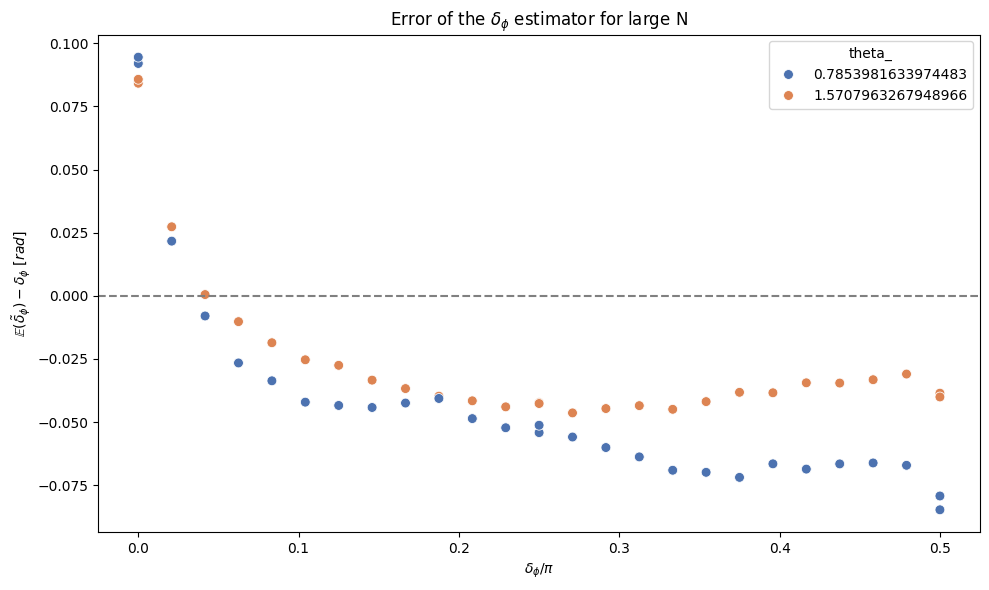

In [36]:
# Define tolerance (adjust as needed)
tol = 0.01  # radians

# Define target theta values (adjust as appropriate)
theta_targets = [np.pi / 2, np.pi / 4]

# Create mask for filtering
mask = np.isclose(
    np.array(delta_phi_estimates["theta_"])[:, np.newaxis],
    theta_targets,
    atol=tol
).any(axis=1)

# Apply mask and N filter
filtered = delta_phi_estimates[mask][delta_phi_estimates["N_"] > 301]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=filtered["delta_phi_"] / np.pi,
    y=(filtered["delta_phi_estimate_mean"] - filtered["delta_phi_"]),
    hue=filtered["theta_"],
    palette="deep",
    s=50,
)

plt.xlabel(r"$\delta_\phi / \pi$")
plt.ylabel(r"$\mathbb{E}(\tilde{\delta}_\phi) - \delta_\phi\ [rad]$")
plt.axline((0, 0), slope=0, color="gray", linestyle="--")

plt.title(r"Error of the $\delta_\phi$ estimator for large N")
plt.tight_layout()

# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "delta_phi_estimator_bias_with_theta_at_large_N.png",
)
plt.savefig(file_name, dpi=300)
plt.show()


#### Theta = pi/2

In [37]:
# get the subset where theta = pi/2 using numpy to find theta close to pi/2

delta_phi_estimates_theta_pi_over_2 = delta_phi_estimates[
    np.isclose(delta_phi_estimates["theta_"], np.pi / 2, atol=0.001)
].reset_index(drop=True)
delta_phi_estimates_theta_pi_over_2

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
0,40.0,1.570796,0.000000,0.221385,0.050362,0.002536,26178,1.547938,0.112923,0.012752
1,40.0,1.570796,0.065450,0.223180,0.051380,0.002640,13118,1.548443,0.112767,0.012716
2,40.0,1.570796,0.130900,0.230878,0.057893,0.003352,13102,1.549001,0.112532,0.012664
3,40.0,1.570796,0.196350,0.250423,0.071158,0.005063,13014,1.548144,0.114158,0.013032
4,40.0,1.570796,0.261799,0.281154,0.085060,0.007235,12559,1.549066,0.113659,0.012918
...,...,...,...,...,...,...,...,...,...,...
148,524720.0,1.570796,0.065450,0.092780,NaN,NaN,1,1.548588,NaN,NaN
149,524720.0,1.570796,0.589049,0.549278,NaN,NaN,1,1.551192,NaN,NaN
150,527200.0,1.570796,0.523599,0.486846,NaN,NaN,1,1.551404,NaN,NaN
151,528280.0,1.570796,0.000000,0.085754,NaN,NaN,1,1.548456,NaN,NaN


##### Mean

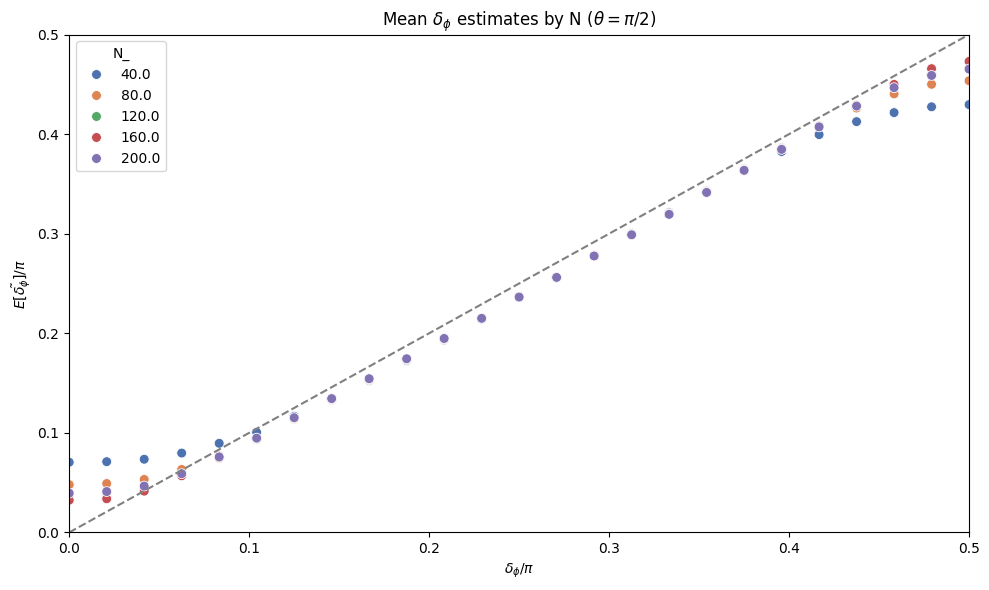

In [38]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_2[
        delta_phi_estimates_theta_pi_over_2["N_"] < 201
    ],
    x=delta_phi_estimates_theta_pi_over_2["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_2["delta_phi_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$E[\tilde{\delta_{\phi}}] / \pi$")

plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.xlim(0, 1 / 2)
plt.ylim(0, 1 / 2)

plt.tight_layout()
plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_delta_phi_estimates_by_N_theta_pi_over_2.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

##### Error

In [39]:
delta_phi_estimates_theta_pi_over_2_with_best_guess = delta_phi_estimates_theta_pi_over_2.merge(
    best_guess_delta_phi_estimates,
    on=["theta_", "delta_phi_"],
    suffixes=("", "_max_n")
).rename(columns={"delta_phi_estimate_mean_max_n": "best_delta_phi_estimate_mean"})

delta_phi_estimates_theta_pi_over_2_with_best_guess["bias"] = (
    delta_phi_estimates_theta_pi_over_2_with_best_guess["delta_phi_estimate_mean"] - delta_phi_estimates_theta_pi_over_2_with_best_guess["best_delta_phi_estimate_mean"]
)

delta_phi_estimates_theta_pi_over_2_with_best_guess

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var,N__max_n,best_delta_phi_estimate_mean,delta_phi_estimate_std_max_n,delta_phi_estimate_var_max_n,delta_phi_count_max_n,theta_estimate_mean_max_n,theta_estimate_std_max_n,theta_estimate_var_max_n,bias
0,40.0,1.570796,0.000000,0.221385,0.050362,0.002536,26178,1.547938,0.112923,0.012752,528280.0,0.085754,NaN,NaN,1,1.548456,NaN,NaN,0.135632
1,40.0,1.570796,0.065450,0.223180,0.051380,0.002640,13118,1.548443,0.112767,0.012716,524720.0,0.092780,NaN,NaN,1,1.548588,NaN,NaN,0.130401
2,40.0,1.570796,0.130900,0.230878,0.057893,0.003352,13102,1.549001,0.112532,0.012664,524080.0,0.131382,NaN,NaN,1,1.549134,NaN,NaN,0.099496
3,40.0,1.570796,0.196350,0.250423,0.071158,0.005063,13014,1.548144,0.114158,0.013032,520560.0,0.186109,NaN,NaN,1,1.548290,NaN,NaN,0.064314
4,40.0,1.570796,0.261799,0.281154,0.085060,0.007235,12559,1.549066,0.113659,0.012918,502360.0,0.243202,NaN,NaN,1,1.549211,NaN,NaN,0.037952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,524720.0,1.570796,0.065450,0.092780,NaN,NaN,1,1.548588,NaN,NaN,524720.0,0.092780,NaN,NaN,1,1.548588,NaN,NaN,0.000000
149,524720.0,1.570796,0.589049,0.549278,NaN,NaN,1,1.551192,NaN,NaN,524720.0,0.549278,NaN,NaN,1,1.551192,NaN,NaN,0.000000
150,527200.0,1.570796,0.523599,0.486846,NaN,NaN,1,1.551404,NaN,NaN,527200.0,0.486846,NaN,NaN,1,1.551404,NaN,NaN,0.000000
151,528280.0,1.570796,0.000000,0.085754,NaN,NaN,1,1.548456,NaN,NaN,528280.0,0.085754,NaN,NaN,1,1.548456,NaN,NaN,0.000000


##### Variance

/tmp/ipykernel_2079439/2895479029.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  theory_filtered = theory_df[


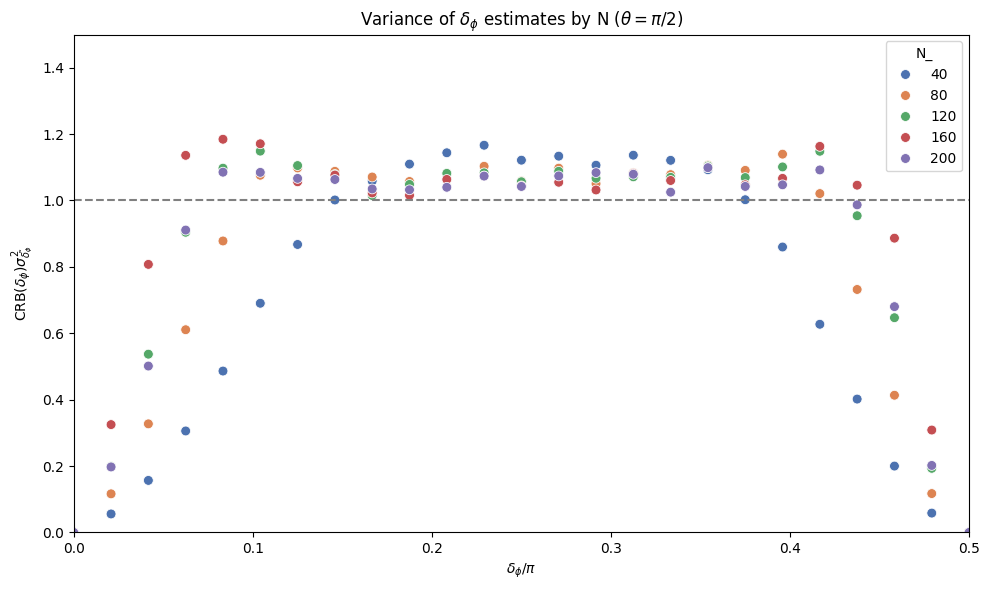

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the shared N values and consistent palette
N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter data
data_filtered = delta_phi_estimates_theta_pi_over_2[
    delta_phi_estimates_theta_pi_over_2["N_"].isin(N_values)
]
theory_filtered = theory_df[
    theory_df["n"].isin([40, 80, 200])  # Can be different subset
][theory_df["theta"] == np.pi / 2]


# Plot scatter data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
    * 2
    * data_filtered["N_"]
    * np.sin(data_filtered["theta_"]) ** 2
    * eta**2 * np.sin(2*data_filtered["delta_phi_"]) ** 2 / (1 - eta**2 * np.cos(2*data_filtered["delta_phi_"]) ** 2), # CRB
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
)

# Plot the cramér-rao bound
# sns.lineplot(
#     x=delta_phi_range / np.pi,
#     y=cramer_rao,
#     color="black",
#     label="Cramér-Rao Bound",
#     linestyle="--",
# )

plt.xlim(0, 1 / 2)
plt.ylim(0, 1.5)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$\text{CRB}(\delta_\phi)\sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.axline((0, 1), slope=0, color="gray", linestyle="--")



plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

plt.tight_layout()
# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

/tmp/ipykernel_2079439/3130344884.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_theory_df = theory_df[theory_df["n"].isin(N_values)][theory_df["theta"] == np.pi / 2]


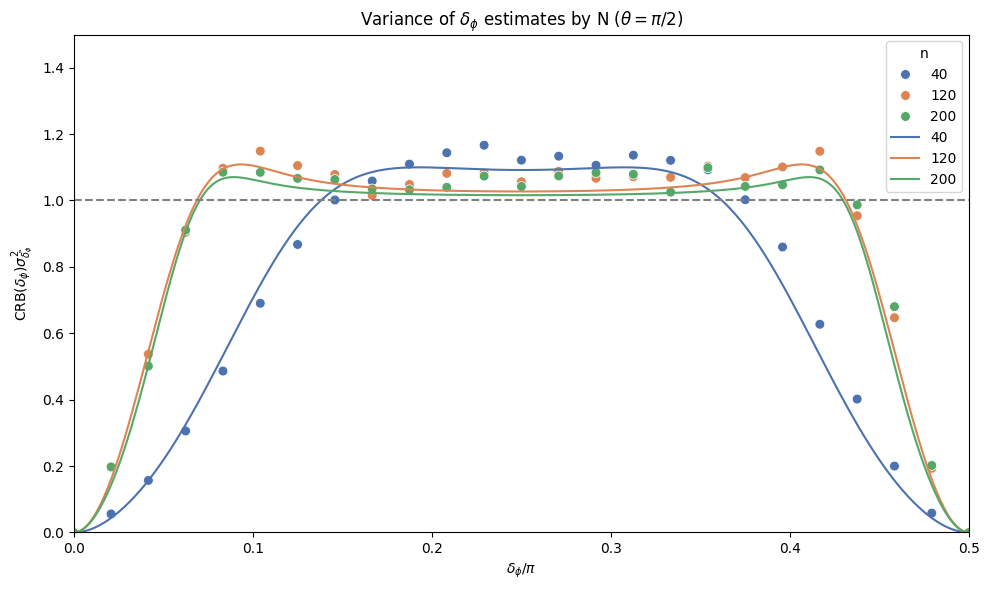

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the shared N values and consistent palette
N_values = [40, 120, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter data
data_filtered = delta_phi_estimates_theta_pi_over_2[
    delta_phi_estimates_theta_pi_over_2["N_"].isin(N_values)
]

# Plot scatter data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
    * 2
    * data_filtered["N_"]
    * np.sin(data_filtered["theta_"]) ** 2
    * eta**2 * np.sin(2*data_filtered["delta_phi_"]) ** 2 / (1 - eta**2 * np.cos(2*data_filtered["delta_phi_"]) ** 2), # CRB
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
)

# Plot the theory curves
filtered_theory_df = theory_df[theory_df["n"].isin(N_values)][theory_df["theta"] == np.pi / 2]
sns.lineplot(
    data=filtered_theory_df,
    x=filtered_theory_df["delta_phi"] / np.pi,
    y=filtered_theory_df[f'VarCRB_nu_{eta:.3f}'],
    hue="n",
    palette=color_dict,
)

plt.xlim(0, 1 / 2)
plt.ylim(0, 1.5)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$\text{CRB}(\delta_\phi)\sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.axline((0, 1), slope=0, color="gray", linestyle="--")



plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/2)$"
)

plt.tight_layout()
# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

In [42]:
# set the colours for plotting:
colours = [
    "fff2cc",
    "ddf7d4"
    "cdedff"
]


#### Theta = pi/4

In [43]:
delta_phi_estimates_theta_pi_over_4 = delta_phi_estimates[delta_phi_estimates["theta_"] == np.pi / 4]
delta_phi_estimates_theta_pi_over_4

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var
18,40.0,0.785398,0.000000,0.323074,0.069795,0.004871,26761,0.766624,0.114932,0.013209
19,40.0,0.785398,0.065450,0.324510,0.066403,0.004409,13407,0.768380,0.114508,0.013112
20,40.0,0.785398,0.130900,0.327830,0.074635,0.005570,13453,0.767940,0.113995,0.012995
21,40.0,0.785398,0.196350,0.339271,0.080422,0.006468,13333,0.764948,0.112975,0.012763
22,40.0,0.785398,0.261799,0.358337,0.094762,0.008980,13221,0.763598,0.114155,0.013031
...,...,...,...,...,...,...,...,...,...,...
713,536280.0,0.785398,0.065450,0.087096,NaN,NaN,1,0.775156,NaN,NaN
715,536880.0,0.785398,0.000000,0.094519,NaN,NaN,1,0.776605,NaN,NaN
716,538120.0,0.785398,0.130900,0.122903,NaN,NaN,1,0.774655,NaN,NaN
717,538680.0,0.785398,0.523599,0.481115,NaN,NaN,1,0.775550,NaN,NaN


##### Mean

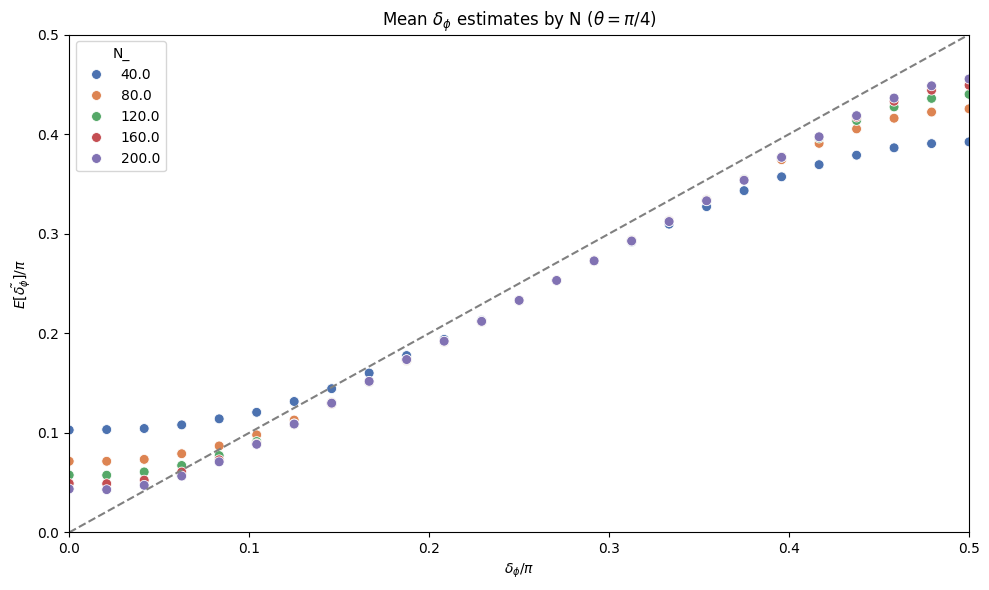

In [44]:
# plot delta_phi_estimates
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=delta_phi_estimates_theta_pi_over_4[
        delta_phi_estimates_theta_pi_over_4["N_"] < 201
    ],
    x=delta_phi_estimates_theta_pi_over_4["delta_phi_"] / np.pi,
    y=delta_phi_estimates_theta_pi_over_4["delta_phi_estimate_mean"] / np.pi,
    hue="N_",
    palette="deep",
    s=50,
)


plt.xlabel(r"$\delta_{\phi} / \pi$")

plt.ylabel(r"$E[\tilde{\delta_{\phi}}] / \pi$")
plt.axline((0, 0), slope=1, color="gray", linestyle="--")

plt.xlim(0, 1 / 2)
plt.ylim(0, 1 / 2)

plt.tight_layout()

plt.title(
    r"$\text{Mean } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$"
)
plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "mean_delta_phi_estimates_by_N_theta_pi_over_4.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

##### Error

In [45]:
delta_phi_estimates_theta_pi_over_4_with_best_guess = delta_phi_estimates_theta_pi_over_4.merge(
    best_guess_delta_phi_estimates,
    on=["theta_", "delta_phi_"],
    suffixes=("", "_max_n")
).rename(columns={"delta_phi_estimate_mean_max_n": "best_delta_phi_estimate_mean"})

delta_phi_estimates_theta_pi_over_4_with_best_guess["bias"] = (
    delta_phi_estimates_theta_pi_over_4_with_best_guess["delta_phi_estimate_mean"] - delta_phi_estimates_theta_pi_over_4_with_best_guess["best_delta_phi_estimate_mean"]
)

delta_phi_estimates_theta_pi_over_4_with_best_guess

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var,N__max_n,best_delta_phi_estimate_mean,delta_phi_estimate_std_max_n,delta_phi_estimate_var_max_n,delta_phi_count_max_n,theta_estimate_mean_max_n,theta_estimate_std_max_n,theta_estimate_var_max_n,bias
0,40.0,0.785398,0.000000,0.323074,0.069795,0.004871,26761,0.766624,0.114932,0.013209,536880.0,0.094519,NaN,NaN,1,0.776605,NaN,NaN,0.228554
1,40.0,0.785398,0.065450,0.324510,0.066403,0.004409,13407,0.768380,0.114508,0.013112,536280.0,0.087096,NaN,NaN,1,0.775156,NaN,NaN,0.237414
2,40.0,0.785398,0.130900,0.327830,0.074635,0.005570,13453,0.767940,0.113995,0.012995,538120.0,0.122903,NaN,NaN,1,0.774655,NaN,NaN,0.204927
3,40.0,0.785398,0.196350,0.339271,0.080422,0.006468,13333,0.764948,0.112975,0.012763,533320.0,0.169742,NaN,NaN,1,0.771580,NaN,NaN,0.169528
4,40.0,0.785398,0.261799,0.358337,0.094762,0.008980,13221,0.763598,0.114155,0.013031,528840.0,0.228123,NaN,NaN,1,0.770388,NaN,NaN,0.130215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,536280.0,0.785398,0.065450,0.087096,NaN,NaN,1,0.775156,NaN,NaN,536280.0,0.087096,NaN,NaN,1,0.775156,NaN,NaN,0.000000
149,536880.0,0.785398,0.000000,0.094519,NaN,NaN,1,0.776605,NaN,NaN,536880.0,0.094519,NaN,NaN,1,0.776605,NaN,NaN,0.000000
150,538120.0,0.785398,0.130900,0.122903,NaN,NaN,1,0.774655,NaN,NaN,538120.0,0.122903,NaN,NaN,1,0.774655,NaN,NaN,0.000000
151,538680.0,0.785398,0.523599,0.481115,NaN,NaN,1,0.775550,NaN,NaN,538680.0,0.481115,NaN,NaN,1,0.775550,NaN,NaN,0.000000


##### Variance

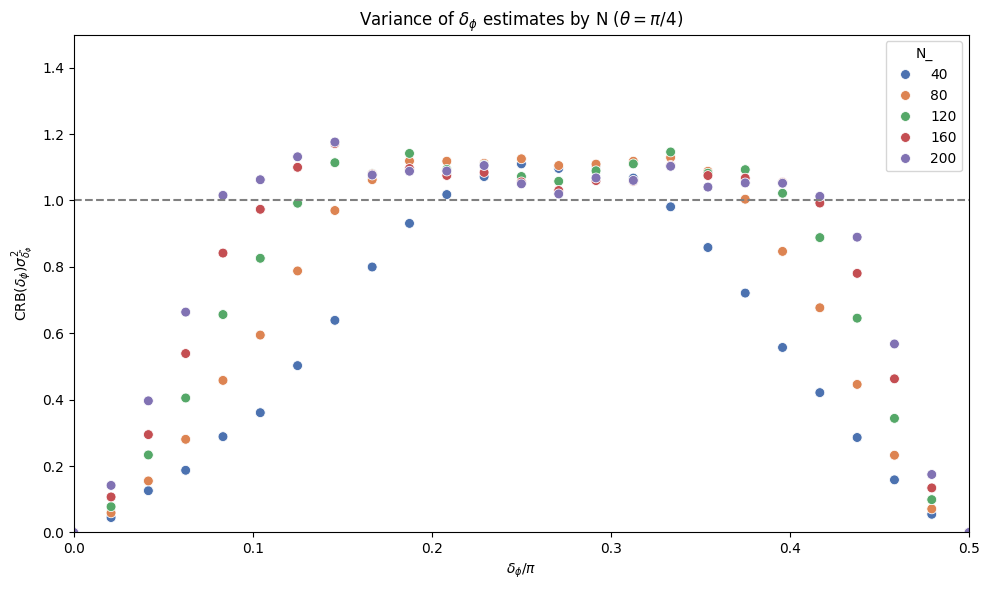

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the shared N values and consistent palette
N_values = [40, 80, 120, 160, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Plot delta_phi_estimates for theta = pi/4 with CRB scaling
plt.figure(figsize=(10, 6))
data_pi_4 = delta_phi_estimates_theta_pi_over_4[
    delta_phi_estimates_theta_pi_over_4["N_"].isin(N_values)
]

sns.scatterplot(
    data=data_pi_4,
    x=data_pi_4["delta_phi_"] / np.pi,
    y=data_pi_4["delta_phi_estimate_var"]
    * 2
    * data_pi_4["N_"]
    * np.sin(data_pi_4["theta_estimate_mean"]) ** 2
    * eta**2 * np.sin(2 * data_pi_4["delta_phi_"]) ** 2
    / (1 - eta**2 * np.cos(2 * data_pi_4["delta_phi_"]) ** 2),
    hue=data_pi_4["N_"].astype(int),
    palette=color_dict,
    s=50,
)

plt.xlim(0, 1 / 2)
plt.ylim(0, 1.5)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$\text{CRB}(\delta_\phi)\sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.axline((0, 1), slope=0, color="gray", linestyle="--")

plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$"
)

plt.tight_layout()

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_4.png",
)
plt.savefig(file_name, dpi=300)
plt.show()


In [47]:
filtered_theory_df

,delta_phi,E_nu_1.000,VarCRB_nu_1.000,E_nu_0.970,VarCRB_nu_0.970,E_nu_0.971,VarCRB_nu_0.971,E_nu_0.972,VarCRB_nu_0.972,E_nu_0.973,...,VarCRB_nu_0.977,E_nu_0.978,VarCRB_nu_0.978,E_nu_0.979,VarCRB_nu_0.979,E_nu_0.980,VarCRB_nu_0.980,data_dir,theta,n
0,0.003142,-3.042822e-03,0.003957,0.097754,3.745658e-04,0.099481,3.586368e-04,0.101144,3.442170e-04,0.102745,...,3.638311e-04,0.101073,5.193501e-04,0.087420,8.352304e-04,0.072902,1.010438e-03,phase_estimation_data_n=200,1.570796,200
1,0.006283,-5.888443e-03,0.015782,0.094677,1.497962e-03,0.096402,1.434300e-03,0.098063,1.376665e-03,0.099663,...,1.453869e-03,0.098007,2.073095e-03,0.084383,3.332690e-03,0.069879,4.034000e-03,phase_estimation_data_n=200,1.570796,200
2,0.009425,-8.537889e-03,0.035336,0.091643,3.369287e-03,0.093365,3.226249e-03,0.095023,3.096737e-03,0.096620,...,3.265797e-03,0.094991,4.648466e-03,0.081416,7.467906e-03,0.066937,9.047577e-03,phase_estimation_data_n=200,1.570796,200
3,0.012566,-1.099285e-02,0.062388,0.088651,5.987042e-03,0.090369,5.733255e-03,0.092024,5.503427e-03,0.093618,...,5.792592e-03,0.092026,8.224657e-03,0.078517,1.320082e-02,0.064073,1.601312e-02,phase_estimation_data_n=200,1.570796,200
4,0.015708,-1.325570e-02,0.096623,0.085703,9.349137e-03,0.087416,8.953604e-03,0.089065,8.595333e-03,0.090655,...,9.024762e-03,0.089110,1.277351e-02,0.075686,2.047686e-02,0.061287,2.487836e-02,phase_estimation_data_n=200,1.570796,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.558230,1.185699e-02,0.012815,-0.194272,1.716632e-03,-0.194922,1.714999e-03,-0.195568,1.714207e-03,-0.196210,...,1.725724e-03,-0.199367,1.731920e-03,-0.199988,1.739784e-03,-0.200606,1.749539e-03,phase_estimation_data_n=40,1.570796,40
1996,1.561372,9.025589e-03,0.007219,-0.197337,9.666106e-04,-0.197987,9.657444e-04,-0.198633,9.653568e-04,-0.199276,...,9.722515e-04,-0.202435,9.758561e-04,-0.203057,9.804161e-04,-0.203675,9.860604e-04,phase_estimation_data_n=40,1.570796,40
1997,1.564513,6.105717e-03,0.003211,-0.200423,4.299262e-04,-0.201074,4.295580e-04,-0.201721,4.294044e-04,-0.202364,...,4.326029e-04,-0.205524,4.342434e-04,-0.206146,4.363141e-04,-0.206765,4.388735e-04,phase_estimation_data_n=40,1.570796,40
1998,1.567655,3.097218e-03,0.000803,-0.203532,1.075300e-04,-0.204183,1.074405e-04,-0.204830,1.074049e-04,-0.205473,...,1.082249e-04,-0.208634,1.086408e-04,-0.209257,1.091652e-04,-0.209875,1.098128e-04,phase_estimation_data_n=40,1.570796,40


/tmp/ipykernel_2079439/3703419762.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_theory_df = theory_df[theory_df["n"].isin(N_values)][theory_df["theta"] == np.pi / 4]


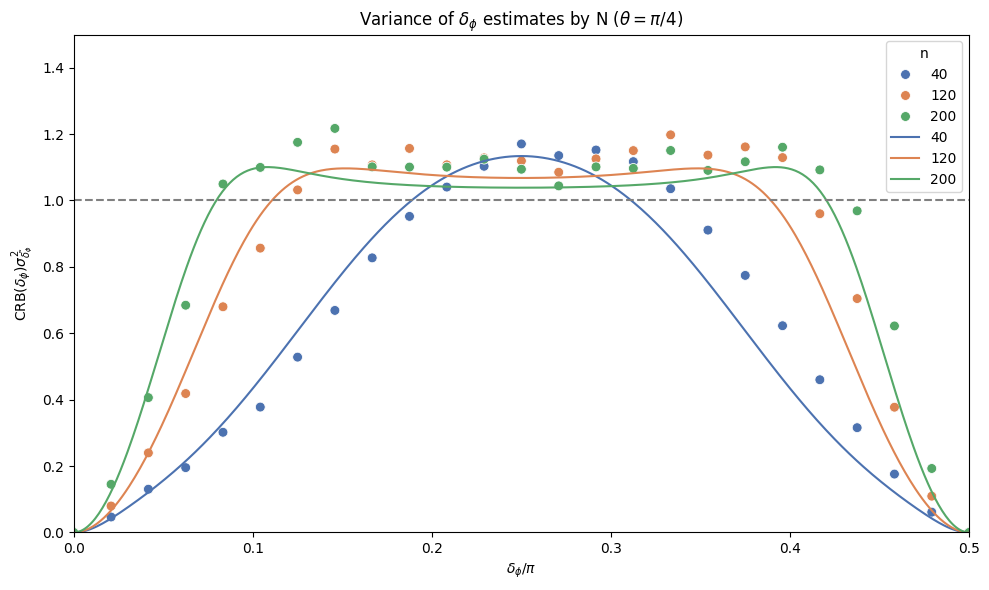

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the shared N values and consistent palette
N_values = [40, 120, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter data
data_filtered = delta_phi_estimates_theta_pi_over_4[
    delta_phi_estimates_theta_pi_over_4["N_"].isin(N_values)
]

# Plot scatter data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
    * 2
    * data_filtered["N_"]
    * np.sin(data_filtered["theta_"]) ** 2
    * eta**2 * np.sin(2*data_filtered["delta_phi_"]) ** 2 / (1 - eta**2 * np.cos(2*data_filtered["delta_phi_"]) ** 2), # CRB
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
)

# Plot the theory curves
filtered_theory_df = theory_df[theory_df["n"].isin(N_values)][theory_df["theta"] == np.pi / 4]
sns.lineplot(
    data=filtered_theory_df,
    x=filtered_theory_df["delta_phi"] / np.pi,
    y=filtered_theory_df[f"VarCRB_nu_{eta:.3f}"],
    hue="n",
    palette=color_dict,
)

plt.xlim(0, 1 / 2)
plt.ylim(0, 1.5)

plt.xlabel(r"$\delta_{\phi} / \pi$")
plt.ylabel(r"$\text{CRB}(\delta_\phi)\sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.axline((0, 1), slope=0, color="gray", linestyle="--")



plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$"
)

plt.tight_layout()
# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_4.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

In [49]:
delta_phi_estimates_theta_pi_over_4[
    delta_phi_estimates_theta_pi_over_4["N_"].isin(N_values)
].merge(best_guess_delta_phi_estimates, on=["theta_", "delta_phi_"], suffixes=("", "_best_guess"))

,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var,N__best_guess,delta_phi_estimate_mean_best_guess,delta_phi_estimate_std_best_guess,delta_phi_estimate_var_best_guess,delta_phi_count_best_guess,theta_estimate_mean_best_guess,theta_estimate_std_best_guess,theta_estimate_var_best_guess
0,40.0,0.785398,0.000000,0.323074,0.069795,0.004871,26761,0.766624,0.114932,0.013209,536880.0,0.094519,NaN,NaN,1,0.776605,NaN,NaN
1,40.0,0.785398,0.065450,0.324510,0.066403,0.004409,13407,0.768380,0.114508,0.013112,536280.0,0.087096,NaN,NaN,1,0.775156,NaN,NaN
2,40.0,0.785398,0.130900,0.327830,0.074635,0.005570,13453,0.767940,0.113995,0.012995,538120.0,0.122903,NaN,NaN,1,0.774655,NaN,NaN
3,40.0,0.785398,0.196350,0.339271,0.080422,0.006468,13333,0.764948,0.112975,0.012763,533320.0,0.169742,NaN,NaN,1,0.771580,NaN,NaN
4,40.0,0.785398,0.261799,0.358337,0.094762,0.008980,13221,0.763598,0.114155,0.013031,528840.0,0.228123,NaN,NaN,1,0.770388,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,200.0,0.785398,1.308997,1.248208,0.080632,0.006502,2607,0.748870,0.050334,0.002534,521520.0,1.240344,NaN,NaN,1,0.750232,NaN,NaN
71,200.0,0.785398,1.374447,1.314847,0.080123,0.006420,2599,0.744449,0.050029,0.002503,519880.0,1.307854,NaN,NaN,1,0.745810,NaN,NaN
72,200.0,0.785398,1.439897,1.370385,0.072951,0.005322,2619,0.741742,0.049074,0.002408,524040.0,1.373679,NaN,NaN,1,0.743057,NaN,NaN
73,200.0,0.785398,1.505346,1.409001,0.060471,0.003657,2607,0.738401,0.049942,0.002494,521640.0,1.438201,NaN,NaN,1,0.739797,NaN,NaN


/tmp/ipykernel_2079439/4093452801.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_theory_df = theory_df[theory_df["n"].isin(N_values)][theory_df["theta"] == np.pi / 4]


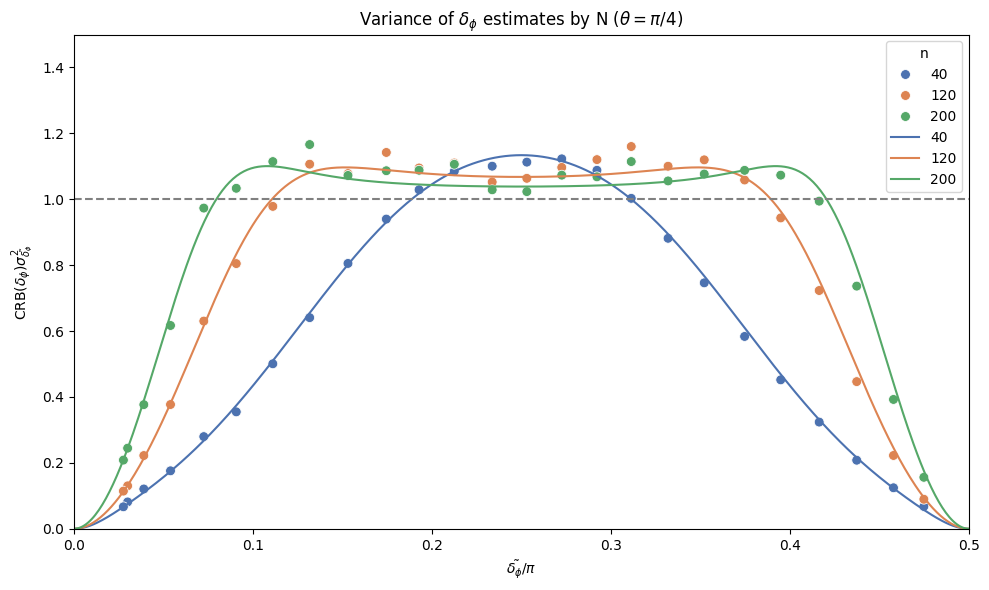

In [50]:


# Define the shared N values and consistent palette
N_values = [40, 120, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter data
data_filtered = delta_phi_estimates_theta_pi_over_4[
    delta_phi_estimates_theta_pi_over_4["N_"].isin(N_values)
].merge(best_guess_delta_phi_estimates, on=["theta_", "delta_phi_"], suffixes=("", "_best_guess"))

# Plot scatter data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_estimate_mean_best_guess"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
    * 2
    * data_filtered["N_"]
    * np.sin(data_filtered["theta_estimate_mean_best_guess"]) ** 2
    * eta**2 * np.sin(2*data_filtered["delta_phi_estimate_mean_best_guess"]) ** 2 / (1 - eta**2 * np.cos(2*data_filtered["delta_phi_estimate_mean_best_guess"]) ** 2), # CRB
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
)

# Plot the theory curves
filtered_theory_df = theory_df[theory_df["n"].isin(N_values)][theory_df["theta"] == np.pi / 4]
sns.lineplot(
    data=filtered_theory_df,
    x=filtered_theory_df["delta_phi"] / np.pi,
    y=filtered_theory_df[f"VarCRB_nu_{eta:.3f}"],
    hue="n",
    palette=color_dict,
)

plt.xlim(0, 1 / 2)
plt.ylim(0, 1.5)

plt.xlabel(r"$\tilde{\delta_{\phi}} / \pi$")
plt.ylabel(r"$\text{CRB}(\delta_\phi)\sigma ^2 _{\tilde{\delta_{\phi}}}$")

plt.axline((0, 1), slope=0, color="gray", linestyle="--")



plt.title(
    r"$\text{Variance of } \delta_{\phi} \text{ estimates by N }  (\theta = \pi/4)$"
)

plt.tight_layout()
# Save
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "variance_delta_phi_estimates_by_N_theta_pi_over_4_using_best_guess_theta_phi.png",
)
plt.savefig(file_name, dpi=300)
plt.show()

# Poster plots

In [51]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "text.latex.preamble": r"""
        \usepackage{amsmath}
        \usepackage{amssymb}
        \usepackage{helvet}
        \renewcommand{\familydefault}{\sfdefault}
    """
})


In [52]:
plot_size_x = 8
plot_size_y = 6

fig_size_x = 10
fig_size_y = 8

## delta variance, imperfect overlap, adjusted, theta = pi/4

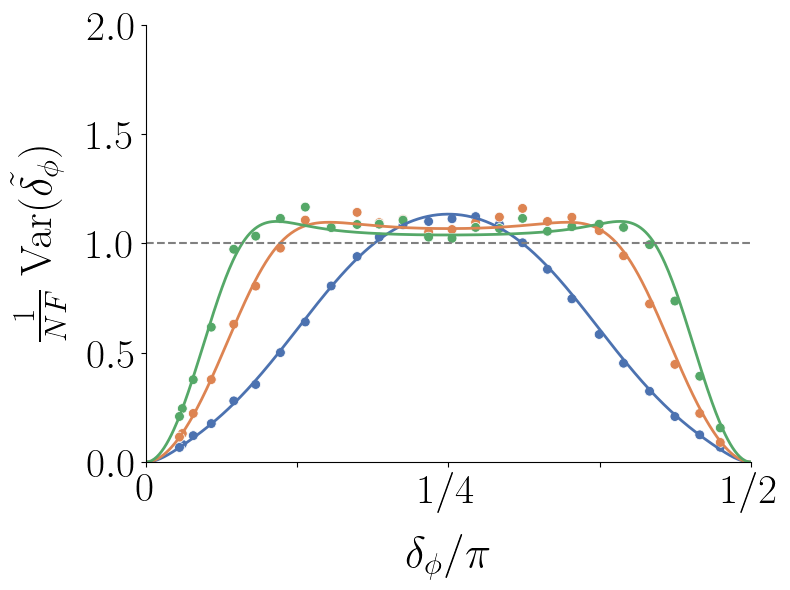

In [53]:
import matplotlib.pyplot as plt

# Define the shared N values and consistent palette
N_values = [40, 120, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter data
data_filtered = delta_phi_estimates_theta_pi_over_4[
    delta_phi_estimates_theta_pi_over_4["N_"].isin(N_values)
].merge(
    best_guess_delta_phi_estimates, 
    on=["theta_", "delta_phi_"], 
    suffixes=("", "_best_guess")
)

# Plot scatter data
fig = plt.figure(figsize=(plot_size_x, plot_size_y))

sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_estimate_mean_best_guess"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
      * 2
      * data_filtered["N_"]
      * np.sin(data_filtered["theta_estimate_mean_best_guess"]) ** 2
      * eta**2 
      * np.sin(2 * data_filtered["delta_phi_estimate_mean_best_guess"]) ** 2
      / (1 - eta**2 * np.cos(2 * data_filtered["delta_phi_estimate_mean_best_guess"]) ** 2),  # CRB
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
    legend=False,  # use custom legend
)

# Plot theory curves
filtered_theory_df = theory_df[
    (theory_df["n"].isin(N_values)) & (theory_df["theta"] == np.pi / 4)
]
for n in N_values:
    df = filtered_theory_df[filtered_theory_df["n"] == n]
    sns.lineplot(
        data=df,
        x=df["delta_phi"] / np.pi,
        y=df[f"VarCRB_nu_{eta:.3f}"],
        color=color_dict[n],
        linewidth=2,
        legend=False,
    )

ax = plt.gca()  # get current axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Axes config
plt.xlim(0, 0.5)
# ticks
plt.xticks(np.arange(0, 0.6, 0.125), fontsize=20)
# axis markers using fractions at 0, 1/4, 1/2


plt.ylim(0, 1.4)
plt.xlabel(r"$\delta_{\phi} / \pi$", fontsize=32, labelpad=15)
plt.ylabel(r"$\frac{1}{NF} \; \mathrm{Var}(\tilde{\delta_{\phi}})$", fontsize=32, labelpad=15)

xticks = np.linspace(0, 0.5, 5, endpoint=True)
xtick_labels = [r"$0$", r"", r"$1/4$", r"", r"$1/2$"]
plt.xticks(xticks, xtick_labels, fontsize=30)

yticks = np.linspace(0, 2, 5, endpoint=True)
ytick_labels = [rf"${str(y)}$" for y in yticks]

# ytick_labels = [r"$0$", r"$0.25$", r"$0.5$", r"$0.75$", r"$1.0$", r"$1.25$"]
plt.yticks(yticks, ytick_labels, fontsize=30)


# Horizontal line
plt.axline((0, 1), slope=0, color="grey", linestyle="--")

# Save
plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "poster-plots",
    "variance_delta_phi_estimates_by_N_theta_pi_over_4_using_best_guess_theta_phi.svg",
)
plt.savefig(file_name, dpi=300)
plt.show()


## delta variance, imperfect overlap, adjusted, theta = pi/2

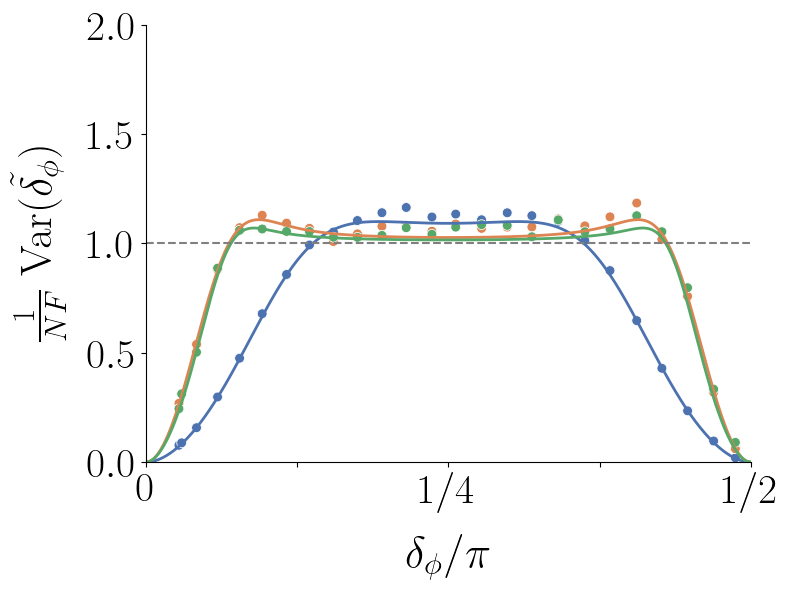

In [54]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Define the shared N values and consistent palette
N_values = [40, 120, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter data
data_filtered = delta_phi_estimates_theta_pi_over_2[
    delta_phi_estimates_theta_pi_over_2["N_"].isin(N_values)
].merge(
    best_guess_delta_phi_estimates,
    on=["theta_", "delta_phi_"],
    suffixes=("", "_best_guess"),
)

# Plot scatter data
plt.figure(figsize=(plot_size_x, plot_size_y))
sns.scatterplot(
    data=data_filtered,
    x=data_filtered["delta_phi_estimate_mean_best_guess"] / np.pi,
    y=data_filtered["delta_phi_estimate_var"]
    * 2
    * data_filtered["N_"]
    * np.sin(data_filtered["theta_estimate_mean_best_guess"]) ** 2
    * eta**2
    * np.sin(2 * data_filtered["delta_phi_estimate_mean_best_guess"]) ** 2
    / (
        1
        - eta**2 * np.cos(2 * data_filtered["delta_phi_estimate_mean_best_guess"]) ** 2
    ),  # CRB
    hue=data_filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
    legend=False,  # use custom legend
)

# Plot theory curves
filtered_theory_df = theory_df[
    (theory_df["n"].isin(N_values)) & (theory_df["theta"] == np.pi / 2)
]
for n in N_values:
    df = filtered_theory_df[filtered_theory_df["n"] == n]
    sns.lineplot(
        data=df,
        x=df["delta_phi"] / np.pi,
        y=df[f"VarCRB_nu_{eta:.3f}"],
        color=color_dict[n],
        linewidth=2,
        legend=False,
    )

ax = plt.gca()  # get current axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)





# Axes config
plt.xlim(0, 0.5)
# ticks
plt.xticks(np.arange(0, 0.6, 0.125), fontsize=20)
# axis markers using fractions at 0, 1/4, 1/2


plt.ylim(0, 1.4)
plt.xlabel(r"$\delta_{\phi} / \pi$", fontsize=32, labelpad=15)
plt.ylabel(
    r"$\frac{1}{NF} \; \mathrm{Var}(\tilde{\delta_{\phi}})$", fontsize=32, labelpad=15
)

xticks = np.linspace(0, 0.5, 5, endpoint=True)
xtick_labels = [r"$0$", r"", r"$1/4$", r"", r"$1/2$"]
plt.xticks(xticks, xtick_labels, fontsize=30)

yticks = np.linspace(0, 2, 5, endpoint=True)
ytick_labels = [rf"${str(y)}$" for y in yticks]

# ytick_labels = [r"$0$", r"$0.25$", r"$0.5$", r"$0.75$", r"$1.0$", r"$1.25$"]
plt.yticks(yticks, ytick_labels, fontsize=30)


# Horizontal line
plt.axline((0, 1), slope=0, color="grey", linestyle="--")

# Save
plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "poster-plots",
    "variance_delta_phi_estimates_by_N_theta_pi_over_2_using_best_guess_theta_phi.svg",
)
plt.savefig(file_name, dpi=300)
plt.show()

## Theta variances

In [55]:
filtered_data

,N_,theta_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count
0,40.0,0.000000,0.016116,0.058896,0.003469,39799
1,40.0,0.130900,0.065325,0.108524,0.011777,39917
2,40.0,0.261799,0.197849,0.143630,0.020630,40117
3,40.0,0.392699,0.346956,0.134025,0.017963,39830
4,40.0,0.523599,0.476084,0.119580,0.014299,35779
...,...,...,...,...,...,...
120,200.0,2.617994,2.611992,0.051370,0.002639,7665
121,200.0,2.748894,2.744294,0.052180,0.002723,7650
122,200.0,2.879793,2.873781,0.052848,0.002793,7628
123,200.0,3.010693,3.005093,0.062621,0.003921,7703


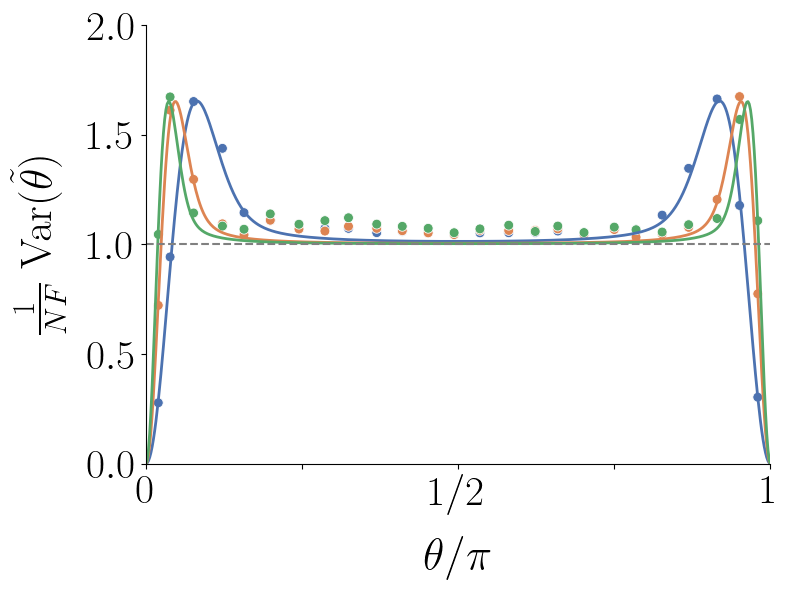

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set up
N_values = [40, 120, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter integrated data
filtered_data = theta_estimates_integrated_over_phi_with_max_n[
    theta_estimates_integrated_over_phi_with_max_n["N_"].isin(N_values)
]

# Filter theory data
theta_theory_plot = theta_theory[theta_theory["n"].isin(N_values)]

# Start plotting
plt.figure(figsize=(plot_size_x, plot_size_y))

# Scatter plot for integrated-over-phi empirical data
sns.scatterplot(
    data=filtered_data,
    x=filtered_data["theta_estimate_mean_max_n"] / np.pi,
    y=filtered_data["theta_estimate_var"] * 2 * filtered_data["N_"],
    hue=filtered_data["N_"].astype(int),
    palette=color_dict,
    s=50,
    legend=False,
)

# Line plot for theory curves
for n in N_values:
    df = theta_theory_plot[theta_theory_plot["n"] == n]
    sns.lineplot(
        data=df,
        x=df["theta"] / np.pi,
        y=df["theta_estimator_variance"] * 2 * df["n"],
        color=color_dict[n],
        linewidth=2,
        legend=False,
    )

# Axes and label styling
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Axes labels
plt.xlabel(r"$\theta / \pi$", fontsize=32, labelpad=15)
plt.ylabel(r"$\frac{1}{NF}\; \mathrm{Var} (\tilde{\theta})$", fontsize=32, labelpad=15)

# Custom ticks
xticks = np.linspace(0, 1, 5)
xtick_labels = [r"$0$", r"", r"$1/2$", r"", r"$1$"]
plt.xticks(xticks, xtick_labels, fontsize=30)

yticks = np.linspace(0, 2, 5)
ytick_labels = [rf"${y:.1f}$" for y in yticks]
plt.yticks(yticks, ytick_labels, fontsize=30)

# Axis limits
plt.xlim(0, 1)
plt.ylim(0, 2)

# Reference lines
plt.axline((0, 1), slope=0, color="grey", linestyle="--")

# Save and show
plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "poster-plots",
    "variance_theta_estimates_by_N_integrated_over_phi.svg"
)
plt.savefig(file_name, dpi=300, bbox_inches='tight')
plt.show()


## Theta bias

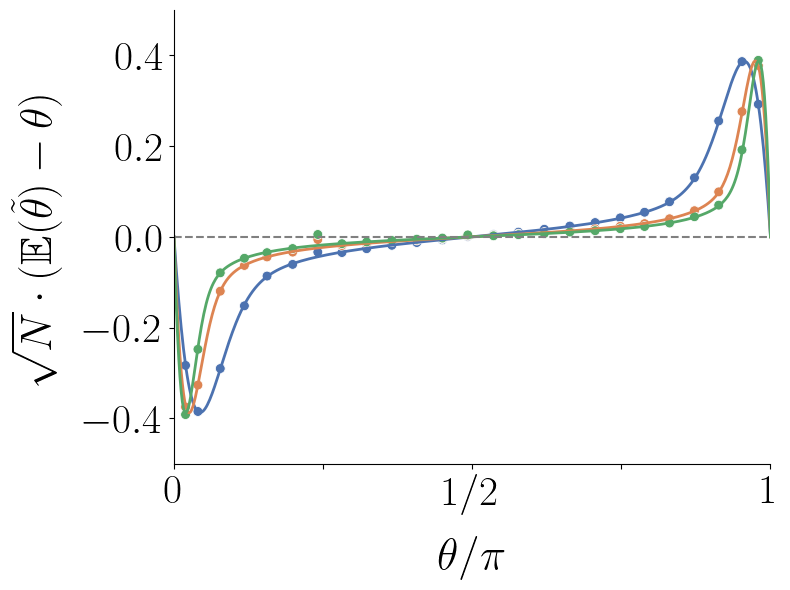

In [57]:
# Set up
N_values = [40, 120, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter and group empirical data
filtered = theta_estimates_with_max_n[
    (theta_estimates_with_max_n["N_"].isin(N_values)) &
    (theta_estimates_with_max_n["delta_phi_"].isin([0, np.pi / 2, np.pi / 4]))
].groupby(["theta_", "N_"]).mean().reset_index()

# Filter theory data
theory_curve = theta_theory[theta_theory["n"].isin(N_values)]

# Plot
plt.figure(figsize=(plot_size_x, plot_size_y))

# Empirical scatter plot
sns.scatterplot(
    x=filtered["theta_estimate_mean_max_n"] / np.pi,
    y=(filtered["theta_estimate_mean"] - filtered["theta_estimate_mean_max_n"]) * np.sqrt(filtered["N_"]),
    hue=filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
    legend=False,
)

# Theory curves
for n in N_values:
    df = theory_curve[theory_curve["n"] == n]
    sns.lineplot(
        x=df["theta"] / np.pi,
        y=(df["theta_estimator_mean"] - df["theta"]) * np.sqrt(df["n"]),
        color=color_dict[n],
        linewidth=2,
        legend=False,
    )

# Axes and label styling
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Labels
plt.xlabel(r"$\theta / \pi$", fontsize=32, labelpad=15)
plt.ylabel(r"$\sqrt{N} \cdot (\mathbb{E}(\tilde{\theta}) - \theta)$", fontsize=32, labelpad=15)

# Custom ticks
xticks = np.linspace(0, 1, 5)
xtick_labels = [r"$0$", r"", r"$1/2$", r"", r"$1$"]
plt.xticks(xticks, xtick_labels, fontsize=30)

yticks = np.linspace(-0.6, 0.6, 7)
ytick_labels = [rf"${y:.1f}$" for y in yticks]
plt.yticks(yticks, ytick_labels, fontsize=30)

# Axis limits
plt.xlim(0, 1)
plt.ylim(-0.5, 0.5)

# Reference line
plt.axline((0, 0), slope=0, color="gray", linestyle="--")

# Save and show
plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "poster-plots",
    "bias_theta_estimates_by_N_integrated_over_phi.svg"
)
plt.savefig(file_name, dpi=300, bbox_inches='tight')
plt.show()


## delta bias, imperfect overlap, adjusted, theta = pi/2

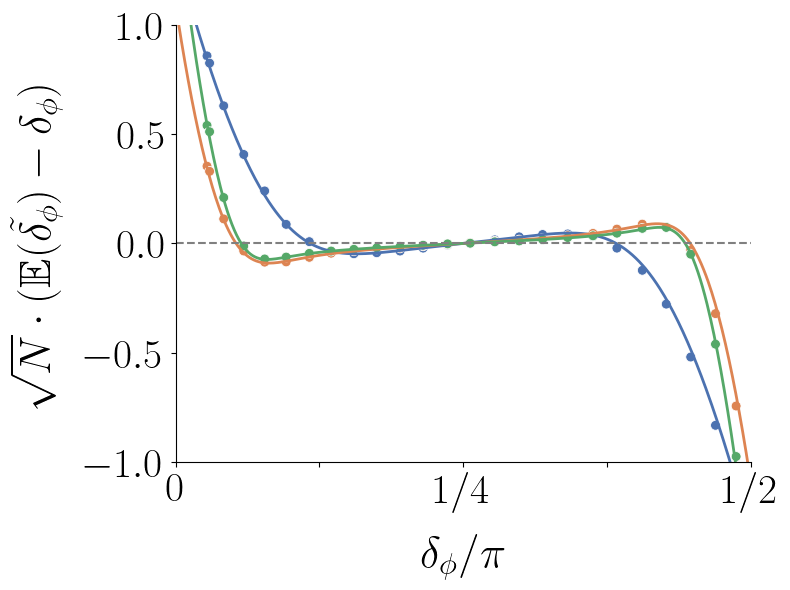

In [58]:
# Set up
N_values = [40, 120, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter and group empirical data
filtered = (
    delta_phi_estimates_theta_pi_over_2_with_best_guess[
        delta_phi_estimates_theta_pi_over_2_with_best_guess["N_"].isin(
            N_values
        )
    ]
    # .groupby(["delta_phi_", "N_"])
    # .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(plot_size_x, plot_size_y))

# Empirical scatter plot
sns.scatterplot(
    x=filtered["best_delta_phi_estimate_mean"] / np.pi,
    y=filtered["bias"] * np.sqrt(filtered["N_"]),
    hue=filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
    legend=False,
)

# Add the theory curve
theory_curve = theory_df[
    np.isclose(theory_df["theta"], np.pi / 2) & theory_df["n"].isin(N_values)
]
sns.lineplot(
    data=theory_curve[np.isclose(theory_curve["theta"], np.pi / 2)][theory_curve["n"].isin(N_values)],
    x=theory_curve["delta_phi"] / np.pi,
    # y=f"E_nu_{eta:.3f}",
    y=(theory_curve[f"E_nu_{eta:.3f}"] * np.sqrt(theory_curve["n"])),
    hue=theory_curve["n"].astype(int),
    palette=color_dict,
    legend=False,

    linewidth=2,
)


# Axes and label styling
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Labels
plt.xlabel(r"$\delta_\phi / \pi$", fontsize=32, labelpad=15)
plt.ylabel(
    r"$\sqrt{N} \cdot (\mathbb{E}(\tilde{\delta_\phi}) - \delta_\phi)$",
    fontsize=32,
    labelpad=15,
)

# Custom ticks
xticks = np.linspace(0, 0.5, 5)
xtick_labels = [r"$0$", r"", r"$1/4$", r"", r"$1/2$"]
plt.xticks(xticks, xtick_labels, fontsize=30)

yticks = np.linspace(-1, 1, 5)
ytick_labels = [rf"${y:.1f}$" for y in yticks]
plt.yticks(yticks, ytick_labels, fontsize=30)

# Axis limits
plt.xlim(0, 0.5)
plt.ylim(-1, 1)

# Reference line
plt.axline((0, 0), slope=0, color="gray", linestyle="--")

# Save and show
plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "poster-plots",
    "bias_delta_phi_estimates_by_N_integrated_over_theta_pi_over_2.svg",
)
plt.savefig(file_name, dpi=300, bbox_inches="tight")
plt.show()

<Axes: xlabel='best_delta_phi_estimate_mean', ylabel='bias'>

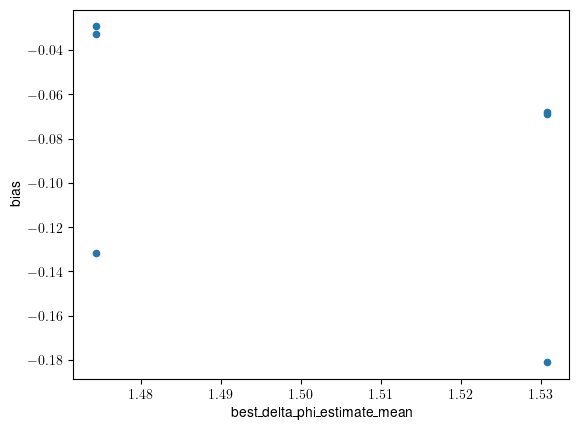

In [59]:
tmp = (delta_phi_estimates_theta_pi_over_2_with_best_guess[
        delta_phi_estimates_theta_pi_over_2_with_best_guess["N_"].isin(
            N_values
        )
    ]
    .groupby(["delta_phi_", "N_"])
    .mean()
    .reset_index()
)

tmp = tmp[tmp["delta_phi_"] > 1.5]

tmp.plot(x="best_delta_phi_estimate_mean", y="bias", kind="scatter")

## delta bias, imperfect overlap, adjusted, theta = pi/4

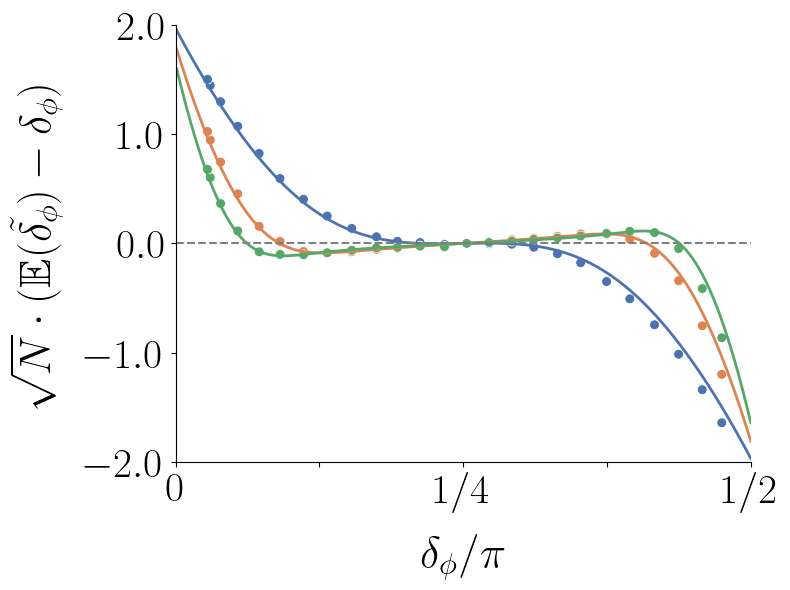

In [60]:
# Set up
N_values = [40, 120, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter and group empirical data
filtered = (
    delta_phi_estimates_theta_pi_over_4_with_best_guess[
        delta_phi_estimates_theta_pi_over_4_with_best_guess["N_"].isin(
            N_values
        )
    ]
    .groupby(["delta_phi_", "N_"])
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(plot_size_x, plot_size_y))

# Empirical scatter plot
sns.scatterplot(
    x=filtered["best_delta_phi_estimate_mean"] / np.pi,
    y=filtered["bias"] * np.sqrt(filtered["N_"]),
    hue=filtered["N_"].astype(int),
    palette=color_dict,
    s=50,
    legend=False,
)

# Add the theory curve
theory_curve = theory_df[
    np.isclose(theory_df["theta"], np.pi / 4) & theory_df["n"].isin(N_values)
]
sns.lineplot(
    data=theory_curve[np.isclose(theory_curve["theta"], np.pi / 4)][
        theory_curve["n"].isin(N_values)
    ],
    x=theory_curve["delta_phi"] / np.pi,
    y=(theory_curve[f"E_nu_{eta:.3f}"] * np.sqrt(theory_curve["n"])),

    hue=theory_curve["n"].astype(int),
    palette=color_dict,
    legend=False,
    linewidth=2,
)

# Axes and label styling
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Labels
plt.xlabel(r"$\delta_\phi / \pi$", fontsize=32, labelpad=15)
plt.ylabel(
    r"$\sqrt{N} \cdot (\mathbb{E}(\tilde{\delta_\phi}) - \delta_\phi)$",
    fontsize=32,
    labelpad=15,
)

# Custom ticks
xticks = np.linspace(0, 0.5, 5)
xtick_labels = [r"$0$", r"", r"$1/4$", r"", r"$1/2$"]
plt.xticks(xticks, xtick_labels, fontsize=30)

yticks = np.linspace(-2, 2, 5)
ytick_labels = [rf"${y:.1f}$" for y in yticks]
plt.yticks(yticks, ytick_labels, fontsize=30)

# Axis limits
plt.xlim(0, 0.5)
plt.ylim(-2, 2)

# Reference line
plt.axline((0, 0), slope=0, color="gray", linestyle="--")

# Save and show
plt.tight_layout()
file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "poster-plots",
    "bias_delta_phi_estimates_by_N_integrated_over_theta_pi_over_4.svg",
)

plt.savefig(file_name, dpi=300, bbox_inches="tight")
plt.show()

## Legend

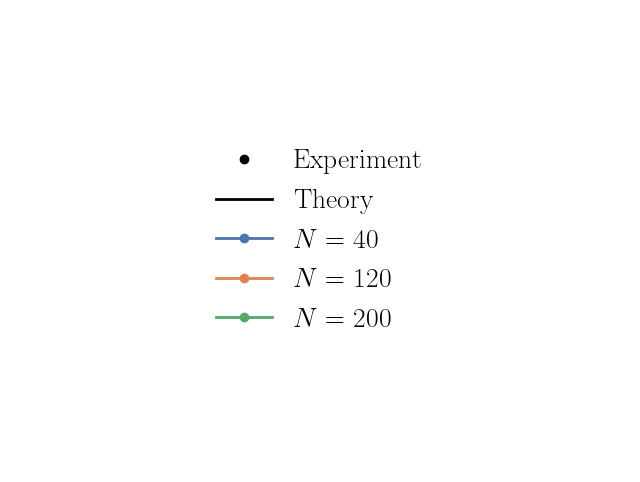

In [61]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import os

N_values = [40, 120, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

plt.figure(figsize=(plot_size_x, plot_size_y))
ax = plt.gca()

# Main legend entries: N values
legend_elements = [
    Line2D([0], [0], color=color_dict[n], lw=2, marker='o', label=fr"$N = {n}$")
    for n in N_values
]

# Legend header entries: Theory and Experiment explanation
header_elements = [
    Line2D([0], [0], color='black', marker='o', lw=0, label=r"$\mathrm{Experiment}$"),
    Line2D([0], [0], color='black', lw=2, label=r"$\mathrm{Theory}$"),
]

all_legend_elements = header_elements + legend_elements

legend = ax.legend(

    handles=all_legend_elements,
    loc='center',
    fontsize=20,
    framealpha=1,
    frameon=False,
    handlelength=2,
    handletextpad=0.8,
    borderpad=0.5
)

ax.axis('off')  # hides all axes, spines, ticks, labels


plt.savefig(os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "poster-plots",
    "legend.svg"
), dpi=300, bbox_inches='tight', pad_inches=0)

plt.show()


## Fisher Information

In [62]:
def fi(delta, eta):
    return eta **2 * np.sin(2 * delta) ** 2 / (1 - eta ** 2 * np.cos(2 * delta) ** 2)

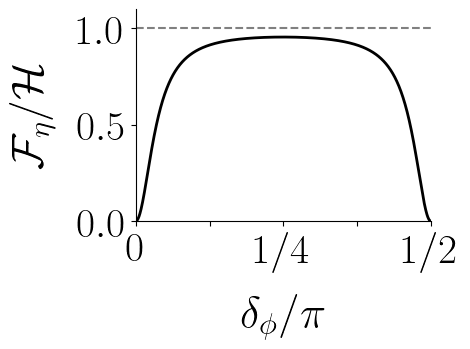

In [63]:
delta = np.linspace(0, np.pi / 2, 1000)
fi_values = fi(delta, eta)

plt.figure(figsize=(plot_size_x * 0.6, plot_size_y * 0.6))

plt.plot(delta / np.pi, fi_values, label=r"$\mathcal{F}(\delta, \eta)$", color="black", linewidth=2)

ax = plt.gca()

# Hide top and right spines as before
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Hide default bottom spine and move it to y=0
ax.spines["bottom"].set_position(("data", 0))
ax.spines["bottom"].set_color("black")

# Optionally hide left spine if you want cleaner look or keep it
ax.spines["left"].set_visible(True)  # or False if you want

# Set ticks to appear only on bottom and left spines
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

# Set x and y labels with font size and padding as before
plt.xlabel(r"$\delta_\phi / \pi$", fontsize=32, labelpad=15)
plt.ylabel(r"$\mathcal{F}_\eta / \mathcal{H}$", fontsize=32, labelpad=15)

# Custom x-ticks and labels as before
xticks = np.linspace(0, 0.5, 5)
xtick_labels = [r"$0$", r"", r"$1/4$", r"", r"$1/2$"]
plt.xticks(xticks, xtick_labels, fontsize=30)

# Y ticks larger font
yticks = np.linspace(0, 1, 3)
ytick_labels = [rf"${y:.1f}$" for y in yticks]
plt.yticks(yticks, ytick_labels, fontsize=30)
plt.yticks(fontsize=30)

# Limit x-axis as before
plt.xlim(0, 0.5)
plt.ylim(0, 1.1)

# Reference horizontal line at y=1 (will be above new x-axis at y=0)
plt.axhline(1, color="gray", linestyle="--")

plt.tight_layout()

# Save and show as before
plt.savefig(file_name, dpi=300, bbox_inches="tight")
plt.show()


## CRB saturation

### Theta

In [64]:
N_values = [40, 120,  200,]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter integrated data
filtered_data = theta_estimates_integrated_over_phi_with_max_n[
    theta_estimates_integrated_over_phi_with_max_n["N_"].isin(N_values)
]

filtered_data

,N_,theta_,theta_estimate_mean,theta_estimate_std,theta_estimate_var,theta_count,N__max_n,theta_estimate_mean_max_n
0,40.0,0.000000,0.016116,0.058896,0.003469,39799,533080.0,0.062144
1,40.0,0.130900,0.065325,0.108524,0.011777,39917,534760.0,0.121573
2,40.0,0.261799,0.197849,0.143630,0.020630,40117,541480.0,0.239775
3,40.0,0.392699,0.346956,0.134025,0.017963,39830,536760.0,0.384868
4,40.0,0.523599,0.476084,0.119580,0.014299,35779,521400.0,0.493402
...,...,...,...,...,...,...,...,...
120,200.0,2.617994,2.611992,0.051370,0.002639,7665,522720.0,2.596644
121,200.0,2.748894,2.744294,0.052180,0.002723,7650,516840.0,2.729884
122,200.0,2.879793,2.873781,0.052848,0.002793,7628,513440.0,2.873075
123,200.0,3.010693,3.005093,0.062621,0.003921,7703,516880.0,2.986062


In [65]:
theta_var_by_n_saturation_region = filtered_data[
    filtered_data["theta_"].between(np.pi / 2 - np.pi/4, np.pi / 2 + np.pi/4)
].groupby("N_").agg(
    theta_estimate_var_mean=("theta_estimate_var", "mean"),
    theta_estimate_var_std=("theta_estimate_var", "std"),
    theta_estimate_mean_max_n=("theta_estimate_mean_max_n", "mean"),
).reset_index()



theta_var_by_n_saturation_region['n'] = theta_var_by_n_saturation_region['N_'].astype(int)
theta_var_by_n_saturation_region['theta_estimate_var_mean_scaled'] = theta_var_by_n_saturation_region['theta_estimate_var_mean'] * 2 * theta_var_by_n_saturation_region['N_']
theta_var_by_n_saturation_region['theta_estimate_var_std_scaled'] = theta_var_by_n_saturation_region['theta_estimate_var_std'] * 2 * theta_var_by_n_saturation_region['N_']
theta_var_by_n_saturation_region


,N_,theta_estimate_var_mean,theta_estimate_var_std,theta_estimate_mean_max_n,n,theta_estimate_var_mean_scaled,theta_estimate_var_std_scaled
0,40.0,0.013233,0.000114,1.554155,40,1.058654,0.009100
1,120.0,0.004426,0.000045,1.554155,120,1.062344,0.010867
2,200.0,0.002701,0.000050,1.554155,200,1.080465,0.020081


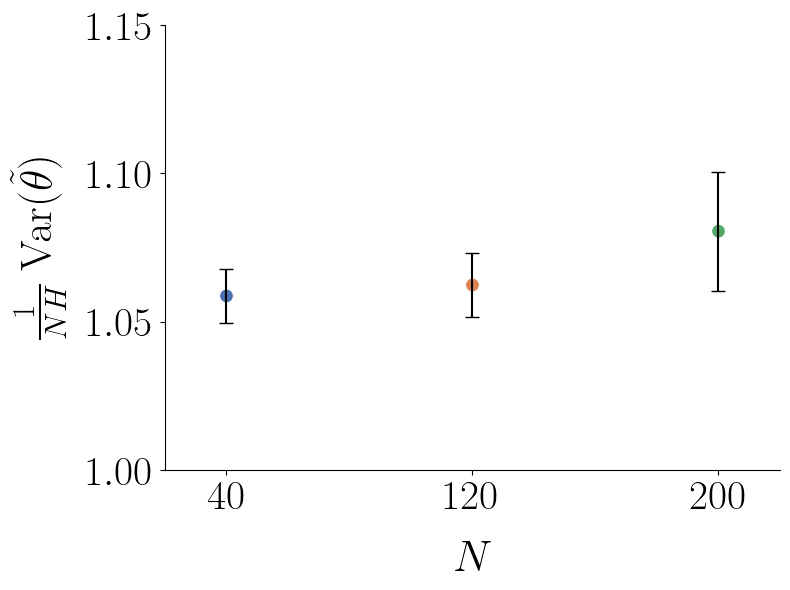

In [66]:
# Plot variance in the saturation region
plt.figure(figsize=(plot_size_x, plot_size_y))

# Barplot with error bars
sns.scatterplot(
    data=theta_var_by_n_saturation_region,
    x="n",
    hue="n",
    y="theta_estimate_var_mean_scaled",
    palette=color_dict,
    s=100,
    legend=False,
)

plt.errorbar(
    theta_var_by_n_saturation_region["n"],
    theta_var_by_n_saturation_region["theta_estimate_var_mean_scaled"],
    yerr=theta_var_by_n_saturation_region["theta_estimate_var_std_scaled"],
    fmt="none",
    color="black",
    capsize=5,
)

# Axes and label styling — following the first snippet’s style
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xlabel(r"$N$", fontsize=32, labelpad=15)
plt.ylabel(r"$\frac{1}{NH} \; \mathrm{Var}(\tilde{\theta})$", fontsize=32, labelpad=15)

# Custom x-ticks and labels as before
xticks = [40,120,200]
xtick_labels = [r"$40$", r"$120$", r"$200$"]
plt.xticks(xticks, xtick_labels, fontsize=30)

# Y ticks larger font
yticks = np.linspace(1, 1.15, 4)
ytick_labels = [rf"${y:.2f}$" for y in yticks]
plt.yticks(yticks, ytick_labels, fontsize=30)
plt.yticks(fontsize=30)

plt.xlim(20, 220)
plt.ylim(1, 1.15)

plt.tight_layout()

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "poster-plots",
    "qcrb_saturation_theta_variance_by_N.svg",
)
plt.savefig(file_name, dpi=300, bbox_inches="tight")
plt.show()


### Delta phi, theta = pi/2

In [67]:
N_values = [40, 120, 200] # ensures the colours match with the previous plots
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter integrated data
filtered_data = delta_phi_estimates_theta_pi_over_2_with_best_guess[
    theta_estimates_integrated_over_phi_with_max_n["N_"].isin(N_values)
]

filtered_data

/tmp/ipykernel_2079439/2553155109.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = delta_phi_estimates_theta_pi_over_2_with_best_guess[


,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var,N__max_n,best_delta_phi_estimate_mean,delta_phi_estimate_std_max_n,delta_phi_estimate_var_max_n,delta_phi_count_max_n,theta_estimate_mean_max_n,theta_estimate_std_max_n,theta_estimate_var_max_n,bias
0,40.0,1.570796,0.000000,0.221385,0.050362,0.002536,26178,1.547938,0.112923,0.012752,528280.0,0.085754,NaN,NaN,1,1.548456,NaN,NaN,0.135632
1,40.0,1.570796,0.065450,0.223180,0.051380,0.002640,13118,1.548443,0.112767,0.012716,524720.0,0.092780,NaN,NaN,1,1.548588,NaN,NaN,0.130401
2,40.0,1.570796,0.130900,0.230878,0.057893,0.003352,13102,1.549001,0.112532,0.012664,524080.0,0.131382,NaN,NaN,1,1.549134,NaN,NaN,0.099496
3,40.0,1.570796,0.196350,0.250423,0.071158,0.005063,13014,1.548144,0.114158,0.013032,520560.0,0.186109,NaN,NaN,1,1.548290,NaN,NaN,0.064314
4,40.0,1.570796,0.261799,0.281154,0.085060,0.007235,12559,1.549066,0.113659,0.012918,502360.0,0.243202,NaN,NaN,1,1.549211,NaN,NaN,0.037952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,200.0,1.570796,1.308997,1.279393,0.057013,0.003250,2450,1.538395,0.051005,0.002601,490280.0,1.274522,NaN,NaN,1,1.538456,NaN,NaN,0.004871
121,200.0,1.570796,1.374447,1.345049,0.057182,0.003270,2456,1.538134,0.051286,0.002630,491360.0,1.339881,NaN,NaN,1,1.538151,NaN,NaN,0.005168
122,200.0,1.570796,1.439897,1.403180,0.053944,0.002910,2446,1.539739,0.050619,0.002562,489400.0,1.406653,NaN,NaN,1,1.539806,NaN,NaN,-0.003473
123,200.0,1.570796,1.505346,1.441765,0.043767,0.001916,2255,1.542452,0.051401,0.002642,451240.0,1.474347,NaN,NaN,1,1.542488,NaN,NaN,-0.032582


In [68]:
half_range_width = np.pi / 8

delta_phi_var_by_n_saturation_region = filtered_data[
    filtered_data["best_delta_phi_estimate_mean"].between(np.pi / 4 - half_range_width, np.pi / 4 + half_range_width)
].groupby("N_").agg(
    delta_phi_estimate_var_mean=("delta_phi_estimate_var", "mean"),
    delta_phi_estimate_var_std=("delta_phi_estimate_var", "std"),
    delta_phi_estimate_mean_max_n=("N_", "mean"),
).reset_index()


delta_phi_var_by_n_saturation_region['n'] = delta_phi_var_by_n_saturation_region['N_'].astype(int)
delta_phi_var_by_n_saturation_region['delta_phi_estimate_var_mean_scaled'] = delta_phi_var_by_n_saturation_region['delta_phi_estimate_var_mean'] * 2 * delta_phi_var_by_n_saturation_region['N_'] * np.sin(np.pi / 2) ** 2 
delta_phi_var_by_n_saturation_region['delta_phi_estimate_var_std_scaled'] = delta_phi_var_by_n_saturation_region['delta_phi_estimate_var_std'] * 2 * delta_phi_var_by_n_saturation_region['N_'] * np.sin(np.pi / 2) ** 2 

delta_phi_var_by_n_saturation_region

,N_,delta_phi_estimate_var_mean,delta_phi_estimate_var_std,delta_phi_estimate_mean_max_n,n,delta_phi_estimate_var_mean_scaled,delta_phi_estimate_var_std_scaled
0,40.0,0.014575,0.000549,40.0,40,1.165974,0.043940
1,120.0,0.004727,0.000123,120.0,120,1.134591,0.029483
2,200.0,0.002805,0.000073,200.0,200,1.121937,0.029151


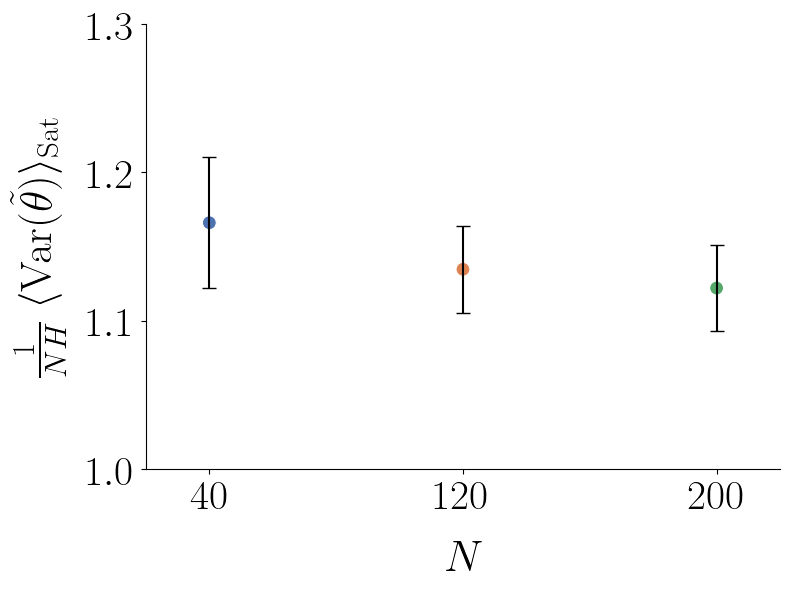

In [69]:
# Plot variance in the saturation region
plt.figure(figsize=(plot_size_x, plot_size_y))

# Barplot with error bars
sns.scatterplot(
    data=delta_phi_var_by_n_saturation_region,
    x="n",
    hue="n",
    y="delta_phi_estimate_var_mean_scaled",
    palette=color_dict,
    s=100,
    legend=False,
)

plt.errorbar(
    delta_phi_var_by_n_saturation_region["n"],
    delta_phi_var_by_n_saturation_region["delta_phi_estimate_var_mean_scaled"],
    yerr=delta_phi_var_by_n_saturation_region["delta_phi_estimate_var_std_scaled"],
    fmt="none",
    color="black",
    capsize=5,
)

# Axes and label styling — following the first snippet’s style
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xlabel(r"$N$", fontsize=32, labelpad=15)
plt.ylabel(r"$\frac{1}{NH}\; \langle \mathrm{Var} (\tilde{\theta}) \rangle_{\mathrm{Sat}}$", fontsize=32, labelpad=15)

# Custom x-ticks and labels as before
xticks = [40,120,200]
xtick_labels = [r"$40$", r"$120$", r"$200$"]
plt.xticks(xticks, xtick_labels, fontsize=30)

# Y ticks larger font
yticks = np.linspace(1, 1.3, 4)
ytick_labels = [rf"${y:.1f}$" for y in yticks]
plt.yticks(yticks, ytick_labels, fontsize=30)
plt.yticks(fontsize=30)

plt.xlim(20, 220)
plt.ylim(1, 1.3)

plt.tight_layout()

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "poster-plots",
    "qcrb_saturation_theta_variance_by_N.svg",
)
plt.savefig(file_name, dpi=300, bbox_inches="tight")
plt.show()


### Delta phi, theta = pi/4

In [70]:
N_values = [40, 120, 200] # ensures the colours match with the previous plots
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Filter integrated data
filtered_data = delta_phi_estimates_theta_pi_over_4_with_best_guess[
    theta_estimates_integrated_over_phi_with_max_n["N_"].isin(N_values)
]

filtered_data

/tmp/ipykernel_2079439/2903790936.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = delta_phi_estimates_theta_pi_over_4_with_best_guess[


,N_,theta_,delta_phi_,delta_phi_estimate_mean,delta_phi_estimate_std,delta_phi_estimate_var,delta_phi_count,theta_estimate_mean,theta_estimate_std,theta_estimate_var,N__max_n,best_delta_phi_estimate_mean,delta_phi_estimate_std_max_n,delta_phi_estimate_var_max_n,delta_phi_count_max_n,theta_estimate_mean_max_n,theta_estimate_std_max_n,theta_estimate_var_max_n,bias
0,40.0,0.785398,0.000000,0.323074,0.069795,0.004871,26761,0.766624,0.114932,0.013209,536880.0,0.094519,NaN,NaN,1,0.776605,NaN,NaN,0.228554
1,40.0,0.785398,0.065450,0.324510,0.066403,0.004409,13407,0.768380,0.114508,0.013112,536280.0,0.087096,NaN,NaN,1,0.775156,NaN,NaN,0.237414
2,40.0,0.785398,0.130900,0.327830,0.074635,0.005570,13453,0.767940,0.113995,0.012995,538120.0,0.122903,NaN,NaN,1,0.774655,NaN,NaN,0.204927
3,40.0,0.785398,0.196350,0.339271,0.080422,0.006468,13333,0.764948,0.112975,0.012763,533320.0,0.169742,NaN,NaN,1,0.771580,NaN,NaN,0.169528
4,40.0,0.785398,0.261799,0.358337,0.094762,0.008980,13221,0.763598,0.114155,0.013031,528840.0,0.228123,NaN,NaN,1,0.770388,NaN,NaN,0.130215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,200.0,0.785398,1.308997,1.248208,0.080632,0.006502,2607,0.748870,0.050334,0.002534,521520.0,1.240344,NaN,NaN,1,0.750232,NaN,NaN,0.007865
121,200.0,0.785398,1.374447,1.314847,0.080123,0.006420,2599,0.744449,0.050029,0.002503,519880.0,1.307854,NaN,NaN,1,0.745810,NaN,NaN,0.006993
122,200.0,0.785398,1.439897,1.370385,0.072951,0.005322,2619,0.741742,0.049074,0.002408,524040.0,1.373679,NaN,NaN,1,0.743057,NaN,NaN,-0.003294
123,200.0,0.785398,1.505346,1.409001,0.060471,0.003657,2607,0.738401,0.049942,0.002494,521640.0,1.438201,NaN,NaN,1,0.739797,NaN,NaN,-0.029200


In [71]:
half_range_width = np.pi / 16

delta_phi_pi_by_4_var_by_n_saturation_region = filtered_data[
    filtered_data["best_delta_phi_estimate_mean"].between(np.pi / 4 - half_range_width, np.pi / 4 + half_range_width)
].groupby("N_").agg(
    delta_phi_estimate_var_mean=("delta_phi_estimate_var", "mean"),
    delta_phi_estimate_var_std=("delta_phi_estimate_var", "std"),
    delta_phi_estimate_mean_max_n=("N_", "mean"),
).reset_index()


delta_phi_pi_by_4_var_by_n_saturation_region['n'] = delta_phi_pi_by_4_var_by_n_saturation_region['N_'].astype(int)
delta_phi_pi_by_4_var_by_n_saturation_region['delta_phi_estimate_var_mean_scaled'] = delta_phi_pi_by_4_var_by_n_saturation_region['delta_phi_estimate_var_mean'] * 2 * delta_phi_pi_by_4_var_by_n_saturation_region['N_'] * np.sin(np.pi / 4) ** 2 
delta_phi_pi_by_4_var_by_n_saturation_region['delta_phi_estimate_var_std_scaled'] = delta_phi_pi_by_4_var_by_n_saturation_region['delta_phi_estimate_var_std'] * 2 * delta_phi_pi_by_4_var_by_n_saturation_region['N_'] * np.sin(np.pi / 4) ** 2 

delta_phi_pi_by_4_var_by_n_saturation_region

,N_,delta_phi_estimate_var_mean,delta_phi_estimate_var_std,delta_phi_estimate_mean_max_n,n,delta_phi_estimate_var_mean_scaled,delta_phi_estimate_var_std_scaled
0,40.0,0.029136,0.001288,40.0,40,1.165458,0.051527
1,120.0,0.009915,0.000364,120.0,120,1.189829,0.043682
2,200.0,0.005797,0.000193,200.0,200,1.159424,0.038541


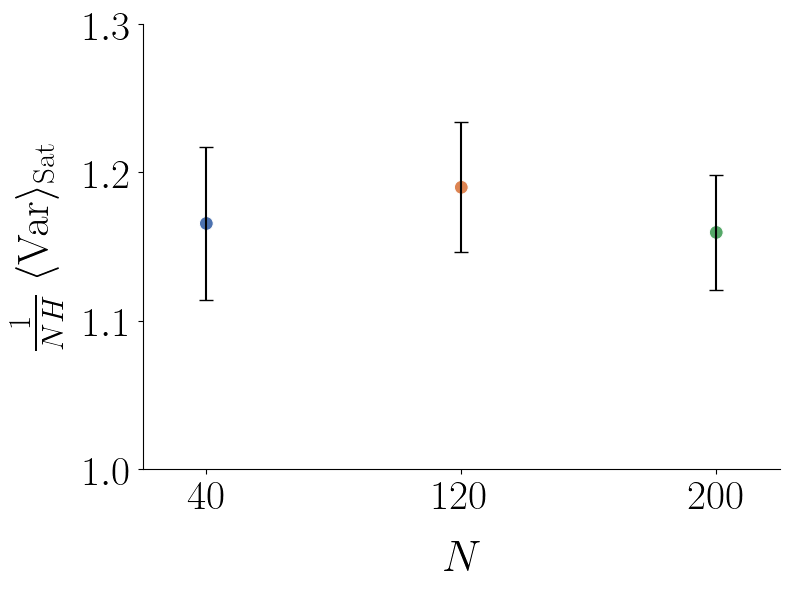

In [72]:
# Plot variance in the saturation region
plt.figure(figsize=(plot_size_x, plot_size_y))

# Barplot with error bars
sns.scatterplot(
    data=delta_phi_pi_by_4_var_by_n_saturation_region,
    x="n",
    hue="n",
    y="delta_phi_estimate_var_mean_scaled",
    palette=color_dict,
    s=100,
    legend=False,
)

plt.errorbar(
    delta_phi_pi_by_4_var_by_n_saturation_region["n"],
    delta_phi_pi_by_4_var_by_n_saturation_region["delta_phi_estimate_var_mean_scaled"],
    yerr=delta_phi_pi_by_4_var_by_n_saturation_region["delta_phi_estimate_var_std_scaled"],
    fmt="none",
    color="black",
    capsize=5,
)

# Axes and label styling — following the first snippet’s style
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xlabel(r"$N$", fontsize=32, labelpad=15)
plt.ylabel(r"$\frac{1}{NH}\; \langle \mathrm{Var}  \rangle_{\mathrm{Sat}}$", fontsize=32, labelpad=15)


# Custom x-ticks and labels as before
xticks = [40,120,200]
xtick_labels = [r"$40$", r"$120$", r"$200$"]
plt.xticks(xticks, xtick_labels, fontsize=30)

# Y ticks larger font
yticks = np.linspace(1, 1.3, 4)
ytick_labels = [rf"${y:.1f}$" for y in yticks]
plt.yticks(yticks, ytick_labels, fontsize=30)
plt.yticks(fontsize=30)

plt.xlim(20, 220)
plt.ylim(1, 1.3)

plt.tight_layout()

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "poster-plots",
    "qcrb_saturation_theta_variance_by_N.svg",
)
plt.savefig(file_name, dpi=300, bbox_inches="tight")
plt.show()


### Consolidated

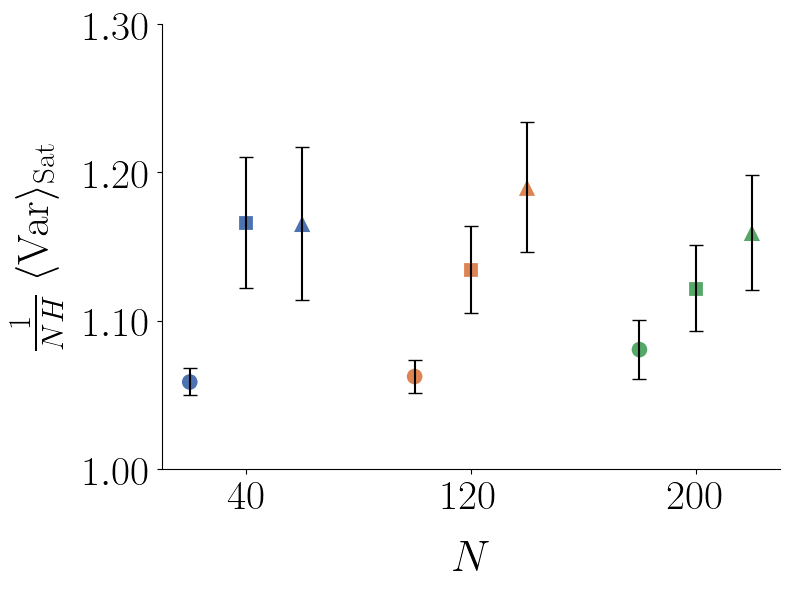

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

marker_size = 1.5

# Define shared x-axis values
n_vals = delta_phi_var_by_n_saturation_region["n"].values

# Define vertical data and errors
theta_mean = theta_var_by_n_saturation_region["theta_estimate_var_mean_scaled"].values
theta_std = theta_var_by_n_saturation_region["theta_estimate_var_std_scaled"].values

delta_phi_mean = delta_phi_var_by_n_saturation_region["delta_phi_estimate_var_mean_scaled"].values
delta_phi_std = delta_phi_var_by_n_saturation_region["delta_phi_estimate_var_std_scaled"].values

delta_phi_pi_by_4_mean = delta_phi_pi_by_4_var_by_n_saturation_region["delta_phi_estimate_var_mean_scaled"].values
delta_phi_pi_by_4_std = delta_phi_pi_by_4_var_by_n_saturation_region["delta_phi_estimate_var_std_scaled"].values

# Define slight x-offsets for better visibility
offset = 20
x_theta = n_vals - offset
x_delta_phi = n_vals
x_delta_phi_pi_by_4 = n_vals + offset  # if applicable

# Plot
plt.figure(figsize=(plot_size_x, plot_size_y))

# Theta
sns.scatterplot(
    x=x_theta,
    y=theta_mean,
    hue=n_vals.astype(int),
    palette=color_dict,
    legend=False,
    marker='o',
    s=100 * marker_size,
)
plt.errorbar(
    x_theta,
    theta_mean,
    yerr=theta_std,
    fmt="None",
    markersize=10,
    color="black",
    label=r"$\frac{1}{NH} \; \mathrm{Var}(\tilde{\theta})$",
    capsize=5,
)

# Delta phi pi by 2
sns.scatterplot(
    x=x_delta_phi,
    y=delta_phi_mean,
    hue=n_vals.astype(int),
    palette=color_dict,
    legend=False,
    marker='s',
    s=78.5* marker_size,
)
plt.errorbar(
    x_delta_phi,
    delta_phi_mean,
    yerr=delta_phi_std,
    fmt="None",
    markersize=10,
    color="black",
    label=r"$\frac{1}{NH}\; \langle \mathrm{Var} (\tilde{\theta}) \rangle_{\mathrm{Sat}}$",
    capsize=5,
)

# Delta phi pi by 4
sns.scatterplot(
    x=x_delta_phi_pi_by_4,
    y=delta_phi_pi_by_4_mean,
    hue=n_vals.astype(int),
    palette=color_dict,
    legend=False,
    marker='^',
    s=120* marker_size,
)
plt.errorbar(
    x_delta_phi_pi_by_4,
    delta_phi_pi_by_4_mean,
    yerr=delta_phi_pi_by_4_std,
    fmt="None",
    markersize=10,
    color="black",
    # marker colour
    label=r"$\frac{1}{NH}\; \langle \mathrm{Var} (\tilde{\theta}) \rangle_{\mathrm{Sat}}$",
    capsize=5,
)

# Optionally: include a third dataset if relevant
# Example: another errorbar here (e.g., diamond or triangle marker)

# Axes styling
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xlabel(r"$N$", fontsize=32, labelpad=15)
plt.ylabel(r"$\frac{1}{NH}\; \langle \mathrm{Var}  \rangle_{\mathrm{Sat}}$", fontsize=32, labelpad=15)


# Ticks
xticks = [40, 120, 200]
xtick_labels = [r"$40$", r"$120$", r"$200$"]
plt.xticks(xticks, xtick_labels, fontsize=30)

yticks = np.linspace(1, 1.3, 4)
ytick_labels = [rf"${y:.2f}$" for y in yticks]
plt.yticks(yticks, ytick_labels, fontsize=30)

plt.xlim(10, 230)
plt.ylim(1, 1.3)


plt.tight_layout()

file_name = os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "poster-plots",
    "consolidated_theta_deltaphi_variance_by_N.svg",
)
plt.savefig(file_name, dpi=300, bbox_inches="tight")
plt.show()


### Legend

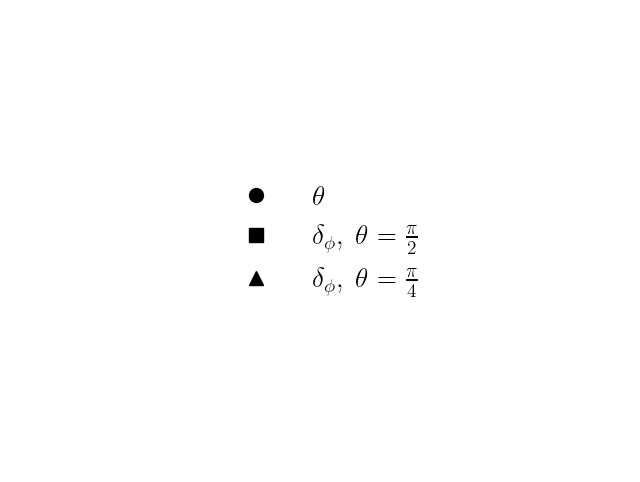

In [79]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import os

N_values = [40, 120, 200]
palette = sns.color_palette("deep", n_colors=len(N_values))
color_dict = dict(zip(N_values, palette))

# Define marker styles for each type
marker_styles = {
    "theta": "o",
    "delta_phi": "s",
    "delta_phi_pi_by_4": "^"
}

# Legend: marker type for each parameter
marker_elements = [
    Line2D([0], [0], color='black', marker=marker_styles["theta"], lw=0, markersize=10,
           label=r"$\theta$"),
    Line2D([0], [0], color='black', marker=marker_styles["delta_phi"], lw=0, markersize=10,
           label=r"$\delta_\phi, \; \theta = \frac{\pi}{2}$"),
    Line2D([0], [0], color='black', marker=marker_styles["delta_phi_pi_by_4"], lw=0, markersize=10,
              label=r"$\delta_\phi, \; \theta = \frac{\pi}{4}$"),
]

plt.figure(figsize=(plot_size_x, plot_size_y))
ax = plt.gca()
legend = ax.legend(
    handles=marker_elements,
    loc='center',
    fontsize=20,
    framealpha=1,
    frameon=False,
    handlelength=2.5,
    handletextpad=0.8,
    borderpad=0.6
)

ax.axis('off')  # hides axes and ticks

# Save as SVG
plt.savefig(os.path.join(
    repo_root,
    "multi-parameter-estimation",
    "post-processing",
    "poster-plots",
    "saturation-legend.svg"
), dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()
